In [1]:
import numpy as np
import scipy.sparse as sp
import pandas as pd

def reverse_complement(seq) :
    rc_seq = ''
    
    for b in seq :
        if b == 'A' :
            rc_seq = 'T' + rc_seq
        elif b == 'C' :
            rc_seq = 'G' + rc_seq
        elif b == 'G' :
            rc_seq = 'C' + rc_seq
        elif b == 'T' :
            rc_seq = 'A' + rc_seq
    
    return rc_seq

In [2]:
apadb_df = pd.read_csv('apadb_processed_v2.csv', sep=',')
polyadb_df = pd.read_csv('polyadb_processed_v3.csv', sep=',')

In [3]:
apadb_df.head()

gene   gene_id  sitenum  num_sites  pas  \
0  ABCB10  ABCB10.5        1          5    0   
1  ABCB10  ABCB10.4        2          5    0   
2  ABCB10  ABCB10.3        3          5    2   
3  ABCB10  ABCB10.2        4          5    1   
4  ABCB10  ABCB10.1        5          5    1   

                                                 seq  \
0  GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...   
1  CTATTTCATGAAAAGCATGGAATATTATATTTTATTGTTCATAATT...   
2  CATAATTAATGAATAAAATTGATATGAATGAATATAGTGTTCTTTG...   
3  TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...   
4  TCAGGAATAAAGAAAAGACTAACATTACACATATCCAAAAACATGT...   

                                             seq_ext  \
0  TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...   
1  CATGAACTAAGCATTTATTAGTTCCCTGATTAGACTGGAAGAAGAA...   
2  AGAAGAAACCACTATTTCATGAAAAGCATGGAATATTATATTTTAT...   
3  TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...   
4  TATAAAACTTCTCACTACATTGTTTCTTAGTAGAATTTGGCTGTGG...   

                                            wide_seq  \
0  TCAGGTTTTGTATTTTCTTTTCTTGTGGAATATTTTAATTAATATA...   
1  AATGTAAATCAAATGGAAGTTTTCCCATGAACTAAGCATTTATTAG...   
2  TTATTAGTTCCCTGATTAGACTGGAAGAAGAAACCACTATTTCATG...   
3  GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...   
4  ACCAAAGATGCAGTCTGTCATTTCTTATAAAACTTCTCACTACATT...   

                                        wide_seq_ext  count  total_count  \
0  GAGTTTTAATAATTGTAACTTTTTAAATGTCTATAGCACTGAAGTT...     10          564   
1  AAGTGCTTTTTCTCCATGGATGAGGCTAGACCCTAAGAAGTAATTA...     73          564   
2  GTAATTAAGTCAATGTAAATCAAATGGAAGTTTTCCCATGAACTAA...      6          564   
3  TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...    467          564   
4  TAGTGAACTTTATCTGTGTCTGTCACTTTTTTTTTTTTTATGACCC...      8          564   

   ratio    pas_pos  cut_start    cut_end   cut_mode chrom strand  \
0  0.018  229653571  229653537  229653551  229653538  chr1      -   
1  0.129  229652609  229652589  229652595  229652591  chr1      -   
2  0.011  229652570  229652539  229652568  229652540  chr1      -   
3  0.828  229652351  229652327  229652337  229652330  chr1      -   
4  0.014  229652165  229652139  229652140  229652140  chr1      -   

                                               mirna  site_type  
0  miR-590-3p,miR-183,miR-219-5p/508/508-3p/4782-...       UTR3  
1   miR-590-3p,miR-183,miR-219-5p/508/508-3p/4782-3p       UTR3  
2                                 miR-590-3p,miR-183       UTR3  
3                                               None       UTR3  
4                                               None  Extension

In [4]:
polyadb_df.head()

gene    gene_id  sitenum  num_sites  pas  \
0  AADACL3  AADACL3.1        1          2    0   
1  AADACL3  AADACL3.2        2          2    0   
2    ABCA4    ABCA4.2        1          2    2   
3    ABCA4    ABCA4.1        2          2    0   
4   ABCB10   ABCB10.2        1          2    0   

                                                 seq  \
0  GTGCTTTCTAATCTGTGGAATGCCAGGGTCCCAGTGTGGGAGCCTT...   
1  GCTGCAGGTGGTGGTTGCTGAAGGTGGGGGAGGCTGTGGCAATTTC...   
2  GTTTATCAAATACAACTCAGACGTCAGTCTCCTGGCCCCTTTGAGA...   
3  TTTCTGCATGTTTGTCTGTGTGTCTGCGTTGTGTGTGATTTTCATG...   
4  TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...   

                                             seq_ext  \
0  TTACCCCCAGGGAATTAGGGGAGAGGAAACACCTTTATTTGCTTTC...   
1  TAAATTGTCGTAATCTTTTTGCTGGTTGATGGTCTTGCCTTGATGT...   
2  CCTCTGATCCATCTCTGTCTGCATGAGTGACAGCTGGCAGAGTCCT...   
3  CCACTAGCAGCTTTGGCCTCCATATTGCTCTCATTTCAAGCAGATC...   
4  TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...   

                                            wide_seq  \
0  TGAGACAATTTTACTGTCTTAGTTATTACCCCCAGGGAATTAGGGG...   
1  TGTATGTTACATTCATGGGAATGTCTAAATTGTCGTAATCTTTTTG...   
2  ATCTCCTCCTGTCATCTCCACCAGGCCTCTGATCCATCTCTGTCTG...   
3  CCAGAACTAGAAACCCCGGGCCATCCCACTAGCAGCTTTGGCCTCC...   
4  GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...   

                                        wide_seq_ext    pas_pos   cut_mode  \
0  AGACAGACAGGAAGATTTGAGAAAAATCAATGAGAGGAAAAAGTCA...   12780316   12780335   
1  TGCGTGGGTTTTCTCTGAGTTCTCCAGCTTCCTCCCACATTCCAAA...   12788705   12788725   
2  GCTCCTCATGCTGTATCCCCAGTCTCTCGGCCTGCCATGTCATCAT...   94501567   94501545   
3  TGGAACACCTGATGGTGAAACCAAACAAATACAAAATCCTTCTCCA...   94458420   94458384   
4  TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...  229652351  229652329   

  chrom strand    site_type  
0  chr1      +       Intron  
1  chr1      +  3_most_exon  
2  chr1      -       Intron  
3  chr1      -  3_most_exon  
4  chr1      -  3_most_exon

In [8]:

#APADB intersection reference bed
output_bed = 'apadb_processed_v2_coordinates_wider_v2.bed'
bed_columns = ['chrom', 'cut_start', 'cut_end', 'gene_id', 'sitenum', 'strand']

apadb_df['cut_start'] = apadb_df['cut_mode'] - 250#75#apadb_df['cut_start'] - 20
apadb_df['cut_end'] = apadb_df['cut_mode'] + 250#75#apadb_df['cut_end'] + 20

apadb_df = apadb_df.sort_values(by=['chrom', 'cut_start'])
apadb_df.to_csv(output_bed, sep='\t', header=False, columns=bed_columns, index=False)


#PolyaDB intersection reference bed
output_bed = 'polyadb_processed_v3_coordinates_wider_v2.bed'

polyadb_df['cut_start'] = polyadb_df['cut_mode'] - 250#75#25
polyadb_df['cut_end'] = polyadb_df['cut_mode'] + 250#75#25

bed_columns = ['chrom', 'cut_start', 'cut_end', 'gene_id', 'sitenum', 'strand']

polyadb_df = polyadb_df.sort_values(by=['chrom', 'cut_start'])
polyadb_df.to_csv(output_bed, sep='\t', header=False, columns=bed_columns, index=False)


In [6]:

#Store alignment reads as bed file to intersect (outer join)

bed_alignment_file = open('unified-atlas_coordinates_v2.bed', 'w')

#55,851,425 reads leslie/unified-atlas_sorted.sam

i = 0
with open('leslie/unified-atlas_sorted.sam', 'r') as f :
    while True :
        line = f.readline().rstrip()
        if line == '' :
            break
        
        #if line[:5] != 'HISEQ' :
        #    i += 1
        #    continue
        
        lineparts = line.split('\t')
        
        if len(lineparts) < 15 :
            continue
        
        if i % 1000000 == 0 :
            print('Processed read ' + str(i))
        
        read_id = lineparts[0]
        read_chr = lineparts[2]
        
        aligned_read = lineparts[9]
        
        read_pos = int(lineparts[3])
        
        cell_type = ''
        if lineparts[19][:3] == 'RG:' :
            cell_type = lineparts[19].split(':')[-1]
        elif lineparts[20][:3] == 'RG:' :
            cell_type = lineparts[20].split(':')[-1]
        elif lineparts[21][:3] == 'RG:' :
            cell_type = lineparts[21].split(':')[-1]
        else :
            print('ERROR! Cell type not extracted correctly.')
        
        #Strand +
        bed_alignment_file.write(read_chr + '\t' + str(read_pos + len(aligned_read)) + '\t' + str(read_pos + len(aligned_read) + 1) + '\t' + read_id + '\t1\t+' + '\t' + aligned_read + '\t' + cell_type + '\n')
        
        #Strand -
        bed_alignment_file.write(read_chr + '\t' + str(read_pos) + '\t' + str(read_pos + 1) + '\t' + read_id + '\t1\t-' + '\t' + reverse_complement(aligned_read) + '\t' + cell_type + '\n')
        
        i += 1


bed_alignment_file.close()


Processed read 0
Processed read 1000000
Processed read 2000000
Processed read 3000000
Processed read 4000000
Processed read 5000000
Processed read 6000000
Processed read 7000000
Processed read 8000000
Processed read 9000000
Processed read 10000000
Processed read 11000000
Processed read 12000000
Processed read 13000000
Processed read 14000000
Processed read 15000000
Processed read 16000000
Processed read 17000000
Processed read 18000000
Processed read 19000000
Processed read 20000000
Processed read 21000000
Processed read 22000000
Processed read 23000000
Processed read 24000000
Processed read 25000000
Processed read 26000000
Processed read 27000000
Processed read 28000000
Processed read 29000000
Processed read 30000000
Processed read 31000000
Processed read 32000000
Processed read 33000000
Processed read 34000000
Processed read 35000000
Processed read 36000000
Processed read 37000000
Processed read 38000000
Processed read 39000000
Processed read 40000000
Processed read 41000000
Processe

In [ ]:
#Bed commands for intersect operation

#Sort leslie reads bed file
#sort -k1,1 -k2,2n unified-atlas_coordinates_v2.bed > unified-atlas_coordinates_v2.sorted.bed

#Intersect with APADB
#bedtools intersect -wa -wb -s -a unified-atlas_coordinates_v2.sorted.bed -b apadb_processed_v2_coordinates_wider_v2.bed -sorted > leslie_apadb_map_wider_v2.bed
# leslie_apadb_map.bed


#Intersect with PolyADB
#bedtools intersect -wa -wb -s -a unified-atlas_coordinates_v2.sorted.bed -b polyadb_processed_v3_coordinates_wider_v2.bed -sorted > leslie_polyadb_map_wider_v2.bed
# leslie_polyadb_map.bed


In [5]:
apadb_df = pd.read_csv('apadb_processed_v2.csv', sep=',').set_index('gene_id')
polyadb_df = pd.read_csv('polyadb_processed_v3.csv', sep=',').set_index('gene_id')

apadb_dict = apadb_df.to_dict(orient='index')
polyadb_dict = polyadb_df.to_dict(orient='index')

In [10]:

def hamming_distance(seq1, seq2) :
    d = 0
    for i in range(0, len(seq1)) :
        if seq1[i] != seq2[i] :
            d += 1
    return d

def edit_distance(s1, s2):
    m = len(s1) + 1
    n = len(s2) + 1

    tbl = {}
    for i in range(m): tbl[i, 0] = i
    for j in range(n): tbl[0, j] = j
    for i in range(1, m) :
        for j in range(1, n) :
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            tbl[i,j] = min(tbl[i, j - 1] + 1, tbl[i - 1, j] + 1, tbl[i - 1, j - 1] + cost)

    return tbl[i,j]


In [11]:
def map_reads_to_annotation_dict(read_map_filename, annotation_dict) :
    i = 0
    with open(read_map_filename, 'r') as f :
        n_mapped_reads = 0
        n_supportive_reads = 0
        n_unsupportive_reads = 0
        n_not_hamming_mapped = 0
        n_not_edit_mapped = 0
        while True :
            line = f.readline().rstrip()
            if line == '' :
                break

            if i % 1000000 == 0 :
                print('Processed read ' + str(i))

            lineparts = line.split('\t')

            cut_coord = int(lineparts[1])
            read_id = lineparts[3]
            aligned_read = lineparts[6]
            cell_type = lineparts[7]
            gene_id = lineparts[11]


            apa_event = annotation_dict[gene_id]

            if 'cell_type' not in apa_event :
                apa_event['cell_type'] = {}

            if cell_type not in apa_event['cell_type'] :
                apa_event['cell_type'][cell_type] = {}

                apa_event['cell_type'][cell_type]['read_count'] = 0
                apa_event['cell_type'][cell_type]['unsupportive_read_count'] = 0
                apa_event['cell_type'][cell_type]['cut_pos'] = []


            #Identify cut position relative to start of PAS CSE hexamer
            read_len = len(aligned_read)
            
            cut_pos = -1
            if apa_event['strand'] == '+' :
                cut_pos = int(cut_coord - apa_event['pas_pos'] - 1)
            else :
                cut_pos = int(apa_event['pas_pos'] - cut_coord + 1)
            
            matched_ref_sequence = apa_event['wide_seq_ext'][:175 + cut_pos][-read_len:]


            if float(hamming_distance(matched_ref_sequence, aligned_read)) <= 0.1 * read_len :
                if cut_pos >= 7 and cut_pos <= 40 :
                    apa_event['cell_type'][cell_type]['read_count'] += 1
                    n_supportive_reads += 1
                else :
                    apa_event['cell_type'][cell_type]['unsupportive_read_count'] += 1
                    n_unsupportive_reads += 1
                
                apa_event['cell_type'][cell_type]['cut_pos'].append(cut_pos)
                
                n_mapped_reads += 1
            else :
                n_not_hamming_mapped += 1
                if float(edit_distance(matched_ref_sequence, aligned_read)) <= 3 : 
                    if cut_pos >= 7 and cut_pos <= 40 :
                        apa_event['cell_type'][cell_type]['read_count'] += 1
                        n_supportive_reads += 1
                    else :
                        apa_event['cell_type'][cell_type]['unsupportive_read_count'] += 1
                        n_unsupportive_reads += 1

                    apa_event['cell_type'][cell_type]['cut_pos'].append(cut_pos)
                    
                    n_mapped_reads += 1
                else :
                    n_not_edit_mapped += 1
                
            i += 1
        
        print('n_mapped_reads = ' + str(n_mapped_reads))
        print('n_supportive_reads = ' + str(n_supportive_reads))
        print('n_unsupportive_reads = ' + str(n_unsupportive_reads))
        print('n_not_hamming_mapped = ' + str(n_not_hamming_mapped))
        print('n_not_edit_mapped = ' + str(n_not_edit_mapped))

In [14]:
map_reads_to_annotation_dict('leslie_apadb_map_wider_v2.bed', apadb_dict)

Processed read 0
Processed read 1000000
Processed read 2000000
Processed read 3000000
Processed read 4000000
Processed read 5000000
Processed read 6000000
Processed read 7000000
Processed read 8000000
Processed read 9000000
Processed read 10000000
Processed read 11000000
Processed read 12000000
Processed read 13000000
Processed read 14000000
Processed read 15000000
Processed read 16000000
Processed read 17000000
Processed read 18000000
Processed read 19000000
Processed read 20000000
Processed read 21000000
Processed read 22000000
Processed read 23000000
Processed read 24000000
Processed read 25000000
Processed read 26000000
Processed read 27000000
Processed read 28000000
Processed read 29000000
Processed read 30000000
Processed read 31000000
Processed read 32000000
Processed read 33000000
Processed read 34000000
Processed read 35000000
Processed read 36000000
Processed read 37000000
Processed read 38000000
Processed read 39000000
Processed read 40000000
Processed read 41000000
Processe

In [15]:
map_reads_to_annotation_dict('leslie_polyadb_map_wider_v2.bed', polyadb_dict)

Processed read 0
Processed read 1000000
Processed read 2000000
Processed read 3000000
Processed read 4000000
Processed read 5000000
Processed read 6000000
Processed read 7000000
Processed read 8000000
Processed read 9000000
Processed read 10000000
Processed read 11000000
Processed read 12000000
Processed read 13000000
Processed read 14000000
Processed read 15000000
Processed read 16000000
Processed read 17000000
Processed read 18000000
Processed read 19000000
Processed read 20000000
Processed read 21000000
Processed read 22000000
Processed read 23000000
Processed read 24000000
Processed read 25000000
Processed read 26000000
Processed read 27000000
Processed read 28000000
Processed read 29000000
Processed read 30000000
Processed read 31000000
Processed read 32000000
Processed read 33000000
Processed read 34000000
Processed read 35000000
Processed read 36000000
Processed read 37000000
Processed read 38000000
Processed read 39000000
Processed read 40000000
Processed read 41000000
Processe

In [17]:
save_suffix = '_wider_v2'

import pickle

#Store APADB pickle
pickle.dump(apadb_dict, open('leslie_apadb_dict' + save_suffix + '.pickle', 'wb'))

#Store POLYADB pickle
pickle.dump(polyadb_dict, open('leslie_polyadb_dict' + save_suffix + '.pickle', 'wb'))


In [9]:
save_suffix = '_wider_v2'

import pickle

#Load APADB pickle
apadb_dict = pickle.load(open('processed_data/leslie_apadb/final/leslie_apadb_dict' + save_suffix + '.pickle', 'rb'))

#Load POLYADB pickle
polyadb_dict = pickle.load(open('processed_data/leslie_polyadb/final/leslie_polyadb_dict' + save_suffix + '.pickle', 'rb'))


In [10]:
apadb_df.head()

gene  sitenum  num_sites  pas  \
gene_id                                     
ABCB10.5  ABCB10        1          5    0   
ABCB10.4  ABCB10        2          5    0   
ABCB10.3  ABCB10        3          5    2   
ABCB10.2  ABCB10        4          5    1   
ABCB10.1  ABCB10        5          5    1   

                                                        seq  \
gene_id                                                       
ABCB10.5  GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...   
ABCB10.4  CTATTTCATGAAAAGCATGGAATATTATATTTTATTGTTCATAATT...   
ABCB10.3  CATAATTAATGAATAAAATTGATATGAATGAATATAGTGTTCTTTG...   
ABCB10.2  TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...   
ABCB10.1  TCAGGAATAAAGAAAAGACTAACATTACACATATCCAAAAACATGT...   

                                                    seq_ext  \
gene_id                                                       
ABCB10.5  TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...   
ABCB10.4  CATGAACTAAGCATTTATTAGTTCCCTGATTAGACTGGAAGAAGAA...   
ABCB10.3  AGAAGAAACCACTATTTCATGAAAAGCATGGAATATTATATTTTAT...   
ABCB10.2  TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...   
ABCB10.1  TATAAAACTTCTCACTACATTGTTTCTTAGTAGAATTTGGCTGTGG...   

                                                   wide_seq  \
gene_id                                                       
ABCB10.5  TCAGGTTTTGTATTTTCTTTTCTTGTGGAATATTTTAATTAATATA...   
ABCB10.4  AATGTAAATCAAATGGAAGTTTTCCCATGAACTAAGCATTTATTAG...   
ABCB10.3  TTATTAGTTCCCTGATTAGACTGGAAGAAGAAACCACTATTTCATG...   
ABCB10.2  GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...   
ABCB10.1  ACCAAAGATGCAGTCTGTCATTTCTTATAAAACTTCTCACTACATT...   

                                               wide_seq_ext  count  \
gene_id                                                              
ABCB10.5  GAGTTTTAATAATTGTAACTTTTTAAATGTCTATAGCACTGAAGTT...     10   
ABCB10.4  AAGTGCTTTTTCTCCATGGATGAGGCTAGACCCTAAGAAGTAATTA...     73   
ABCB10.3  GTAATTAAGTCAATGTAAATCAAATGGAAGTTTTCCCATGAACTAA...      6   
ABCB10.2  TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...    467   
ABCB10.1  TAGTGAACTTTATCTGTGTCTGTCACTTTTTTTTTTTTTATGACCC...      8   

          total_count  ratio    pas_pos  cut_start    cut_end   cut_mode  \
gene_id                                                                    
ABCB10.5          564  0.018  229653571  229653537  229653551  229653538   
ABCB10.4          564  0.129  229652609  229652589  229652595  229652591   
ABCB10.3          564  0.011  229652570  229652539  229652568  229652540   
ABCB10.2          564  0.828  229652351  229652327  229652337  229652330   
ABCB10.1          564  0.014  229652165  229652139  229652140  229652140   

         chrom strand                                              mirna  \
gene_id                                                                    
ABCB10.5  chr1      -  miR-590-3p,miR-183,miR-219-5p/508/508-3p/4782-...   
ABCB10.4  chr1      -   miR-590-3p,miR-183,miR-219-5p/508/508-3p/4782-3p   
ABCB10.3  chr1      -                                 miR-590-3p,miR-183   
ABCB10.2  chr1      -                                               None   
ABCB10.1  chr1      -                                               None   

          site_type  
gene_id              
ABCB10.5       UTR3  
ABCB10.4       UTR3  
ABCB10.3       UTR3  
ABCB10.2       UTR3  
ABCB10.1  Extension

In [12]:
#Load stored indexes

apadb_index = np.load('processed_data/leslie_apadb/final/leslie_apadb_index' + save_suffix + '.npy')

polyadb_index = np.load('processed_data/leslie_polyadb/final/leslie_polyadb_index' + save_suffix + '.npy')

In [14]:
#Store filtered dataframes

apadb_df_filtered = apadb_df.loc[apadb_index].reset_index()
apadb_df_filtered.to_csv('leslie_apadb_data' + save_suffix + '.csv', sep=',', header=True, index=False)

polyadb_df_filtered = polyadb_df.loc[polyadb_index].reset_index()
polyadb_df_filtered.to_csv('leslie_polyadb_data' + save_suffix + '.csv', sep=',', header=True, index=False)


In [19]:

#Construct read count matrices per cell type

apadb_gene_whitelist = {}
for gene_id in apadb_dict :
    if 'cell_type' in apadb_dict[gene_id] :
        apadb_gene_whitelist[apadb_dict[gene_id]['gene']] = True

apadb_index_not_pruned = list(apadb_df.index.values.copy())

apadb_index = []
for gene_id in apadb_index_not_pruned :
    if apadb_dict[gene_id]['gene'] in apadb_gene_whitelist :
        apadb_index.append(gene_id)

apadb_index = np.array(apadb_index, dtype=np.object)
print('len(apadb_index) = ' + str(len(apadb_index)))

np.save('leslie_apadb_index' + save_suffix, apadb_index)

polyadb_gene_whitelist = {}
for gene_id in polyadb_dict :
    if 'cell_type' in polyadb_dict[gene_id] :
        polyadb_gene_whitelist[polyadb_dict[gene_id]['gene']] = True

polyadb_index_not_pruned = list(polyadb_df.index.values.copy())

polyadb_index = []
for gene_id in polyadb_index_not_pruned :
    if polyadb_dict[gene_id]['gene'] in polyadb_gene_whitelist :
        polyadb_index.append(gene_id)

polyadb_index = np.array(polyadb_index, dtype=np.object)
print('len(polyadb_index) = ' + str(len(polyadb_index)))

np.save('leslie_polyadb_index' + save_suffix, polyadb_index)


len(apadb_index) = 59731
len(polyadb_index) = 66454


In [20]:

def accumulate_count_matrices(mapped_index, mapped_dict, use_cell_type_index=None) :
    isoform_count_matrix_dict = {}
    cleavage_count_matrix_dict = {}
    cleavage_count_matrix_ext_dict = {}
    cleavage_count_matrix_wide_dict = {}
    cleavage_count_matrix_wide_ext_dict = {}

    n_events = len(mapped_index)

    cell_type_index = []

    for i in range(0, n_events) :
        if i % 10000 == 0 :
            print('Processed APA event ' + str(i))
        
        gene_id = mapped_index[i]

        apa_event = mapped_dict[gene_id]
        
        if 'cell_type' not in apa_event :
            continue

        for cell_type in apa_event['cell_type'] :
            if cell_type not in cell_type_index :
                cell_type_index.append(cell_type)

                isoform_count_matrix_dict[cell_type] = np.zeros((n_events, 1))
                cleavage_count_matrix_dict[cell_type] = sp.lil_matrix((n_events, 186))
                cleavage_count_matrix_ext_dict[cell_type] = sp.lil_matrix((n_events, 286))
                cleavage_count_matrix_wide_dict[cell_type] = sp.lil_matrix((n_events, 256))
                cleavage_count_matrix_wide_ext_dict[cell_type] = sp.lil_matrix((n_events, 356))

            read_count = apa_event['cell_type'][cell_type]['read_count']
            cut_pos = apa_event['cell_type'][cell_type]['cut_pos']

            isoform_count_matrix_dict[cell_type][i, 0] = read_count

            for j in range(0, len(cut_pos)) :
                adjusted_pos = cut_pos[j] + 50
                if adjusted_pos >= 0 and adjusted_pos < 186 :
                    cleavage_count_matrix_dict[cell_type][i, adjusted_pos] += 1
            
            for j in range(0, len(cut_pos)) :
                adjusted_pos = cut_pos[j] + 100
                if adjusted_pos >= 0 and adjusted_pos < 286 :
                    cleavage_count_matrix_ext_dict[cell_type][i, adjusted_pos] += 1
            
            for j in range(0, len(cut_pos)) :
                adjusted_pos = cut_pos[j] + 125
                if adjusted_pos >= 0 and adjusted_pos < 256 :
                    cleavage_count_matrix_wide_dict[cell_type][i, adjusted_pos] += 1
            
            for j in range(0, len(cut_pos)) :
                adjusted_pos = cut_pos[j] + 175
                if adjusted_pos >= 0 and adjusted_pos < 356 :
                    cleavage_count_matrix_wide_ext_dict[cell_type][i, adjusted_pos] += 1
        
    
    if use_cell_type_index is None :
        cell_type_index = np.array(cell_type_index, dtype=object)
    else :
        cell_type_index = use_cell_type_index
    
    n_cell_types = len(cell_type_index)
    
    isoform_count_matrix = np.zeros((n_events, n_cell_types))
    for j in range(0, n_cell_types) :
        cell_type = cell_type_index[j]
        isoform_count_slice = isoform_count_matrix_dict[cell_type]
        isoform_count_matrix[:, j] = isoform_count_slice[:, 0]
        
        cleavage_count_matrix_dict[cell_type] = sp.csr_matrix(cleavage_count_matrix_dict[cell_type])
        cleavage_count_matrix_ext_dict[cell_type] = sp.csr_matrix(cleavage_count_matrix_ext_dict[cell_type])
        cleavage_count_matrix_wide_dict[cell_type] = sp.csr_matrix(cleavage_count_matrix_wide_dict[cell_type])
        cleavage_count_matrix_wide_ext_dict[cell_type] = sp.csr_matrix(cleavage_count_matrix_wide_ext_dict[cell_type])
    
    return cell_type_index, isoform_count_matrix, cleavage_count_matrix_dict, cleavage_count_matrix_ext_dict, cleavage_count_matrix_wide_dict, cleavage_count_matrix_wide_ext_dict


In [21]:

import scipy.io as spio

apadb_cell_type_index, apadb_isoform_count_matrix, apadb_cleavage_count_matrix_dict, apadb_cleavage_count_matrix_ext_dict, apadb_cleavage_count_matrix_wide_dict, apadb_cleavage_count_matrix_wide_ext_dict = accumulate_count_matrices(apadb_index, apadb_dict)

np.save('apadb_celltype_index' + save_suffix, apadb_cell_type_index)
np.save('apadb_isoform_count' + save_suffix, apadb_isoform_count_matrix)
spio.savemat('apadb_cleavage_count' + save_suffix, apadb_cleavage_count_matrix_dict)
spio.savemat('apadb_cleavage_count_ext' + save_suffix, apadb_cleavage_count_matrix_ext_dict)
spio.savemat('apadb_cleavage_count_wide' + save_suffix, apadb_cleavage_count_matrix_wide_dict)
spio.savemat('apadb_cleavage_count_wide_ext' + save_suffix, apadb_cleavage_count_matrix_wide_ext_dict)


Processed APA event 0
Processed APA event 10000
Processed APA event 20000
Processed APA event 30000
Processed APA event 40000
Processed APA event 50000


In [22]:

polyadb_cell_type_index, polyadb_isoform_count_matrix, polyadb_cleavage_count_matrix_dict, polyadb_cleavage_count_matrix_ext_dict, polyadb_cleavage_count_matrix_wide_dict, polyadb_cleavage_count_matrix_wide_ext_dict = accumulate_count_matrices(polyadb_index, polyadb_dict)

np.save('polyadb_celltype_index' + save_suffix, polyadb_cell_type_index)
np.save('polyadb_isoform_count' + save_suffix, polyadb_isoform_count_matrix)
spio.savemat('polyadb_cleavage_count' + save_suffix, polyadb_cleavage_count_matrix_dict)
spio.savemat('polyadb_cleavage_count_ext' + save_suffix, polyadb_cleavage_count_matrix_ext_dict)
spio.savemat('polyadb_cleavage_count_wide' + save_suffix, polyadb_cleavage_count_matrix_wide_dict)
spio.savemat('polyadb_cleavage_count_wide_ext' + save_suffix, polyadb_cleavage_count_matrix_wide_ext_dict)


Processed APA event 0
Processed APA event 10000
Processed APA event 20000
Processed APA event 30000
Processed APA event 40000
Processed APA event 50000
Processed APA event 60000


In [23]:

#Extract auxiliary dimensions

#Gene index
#Total count per gene
#Event type (intron, utr3, etc.)
#APADB pooled count
#APADB pooled total count per gene

def get_aux_dimensions(mapped_index, cell_type_index, mapped_dict, isoform_count_matrix, has_orig_count=False) :
    
    gene_index = []
    site_index = []
    gene_map = {}
    
    for i in range(0, len(mapped_index)) :
        gene_name = mapped_index[i].split('.')[0]
        gene_index.append(gene_name)
        
        if gene_name not in gene_map :
            gene_map[gene_name] = []
        
        site_index.append(gene_map[gene_name])
        gene_map[gene_name].append(i)
    
    gene_index = np.array(gene_index, dtype=np.object)
    site_index = np.array(site_index, dtype=np.object)
    
    num_sites = np.zeros(len(mapped_index))
    for i in range(0, len(mapped_index)) :
        num_sites[i] = len(mapped_index[gene_index == gene_index[i]])
    
    total_count = np.zeros((len(mapped_index), len(cell_type_index)))
    for i in range(0, len(mapped_index)) :
        gene_name = gene_index[i]
        
        event_index = np.array(gene_map[gene_name], dtype=np.int)
        total_count[i, :] = np.sum(isoform_count_matrix[event_index, :], axis=0)
    
    type_index = []
    for i in range(0, len(mapped_index)) :
        type_index.append(mapped_dict[mapped_index[i]]['site_type'])
    
    type_index = np.array(type_index, dtype=np.object)
    
    
    #APADB pooled tissue count
    orig_count = np.zeros(len(mapped_index))
    orig_total_count = np.zeros(len(mapped_index))
    
    if has_orig_count :
        for i in range(0, len(mapped_index)) :
            orig_count[i] = mapped_dict[mapped_index[i]]['count']
            orig_total_count[i] = mapped_dict[mapped_index[i]]['total_count']
        
    
    return gene_index, site_index, num_sites, type_index, total_count, orig_count, orig_total_count


In [24]:

apadb_gene_index, apadb_site_index, apadb_num_sites, apadb_type_index, apadb_total_count_matrix, apadb_orig_count, apadb_orig_total_count = get_aux_dimensions(apadb_index, apadb_cell_type_index, apadb_dict, apadb_isoform_count_matrix, has_orig_count=True)

np.save('apadb_gene_index' + save_suffix, apadb_gene_index)
np.save('apadb_site_index' + save_suffix, apadb_site_index)
np.save('apadb_num_sites' + save_suffix, apadb_num_sites)
np.save('apadb_type_index' + save_suffix, apadb_type_index)
np.save('apadb_total_count' + save_suffix, apadb_total_count_matrix)

np.save('apadb_orig_count' + save_suffix, apadb_orig_count)
np.save('apadb_orig_total_count' + save_suffix, apadb_orig_total_count)


In [25]:

polyadb_gene_index, polyadb_site_index, polyadb_num_sites, polyadb_type_index, polyadb_total_count_matrix, _, _ = get_aux_dimensions(polyadb_index, polyadb_cell_type_index, polyadb_dict, polyadb_isoform_count_matrix)

np.save('polyadb_gene_index' + save_suffix, polyadb_gene_index)
np.save('polyadb_site_index' + save_suffix, polyadb_site_index)
np.save('polyadb_num_sites' + save_suffix, polyadb_num_sites)
np.save('polyadb_type_index' + save_suffix, polyadb_type_index)
np.save('polyadb_total_count' + save_suffix, polyadb_total_count_matrix)


In [28]:
#Total and Avg read count by non-zero genes

total_read_count_by_gene = np.sum(apadb_isoform_count_matrix)
avg_read_count_by_gene = total_read_count_by_gene / float(apadb_isoform_count_matrix.shape[0] * apadb_isoform_count_matrix.shape[1])

print('total_read_count = ' + str(total_read_count_by_gene))
print('avg_read_count_by_nonzero_gene = ' + str(avg_read_count_by_gene))

#Avg read count by non-zero events

n_nonzero_events = np.sum(apadb_isoform_count_matrix > 0)

avg_read_count_by_event = total_read_count_by_gene / n_nonzero_events

print('avg_read_count_by_nonzero_event = ' + str(avg_read_count_by_event))


total_read_count = 44858914.0
avg_read_count_by_nonzero_gene = 44.177389413517666
avg_read_count_by_nonzero_event = 126.47857199246636


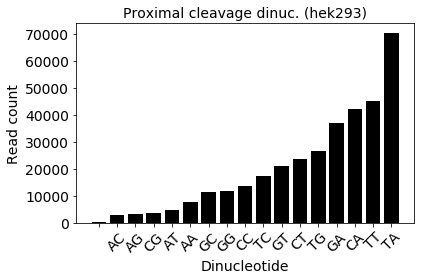

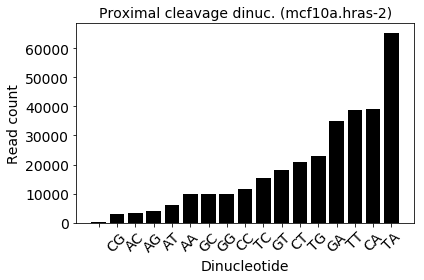

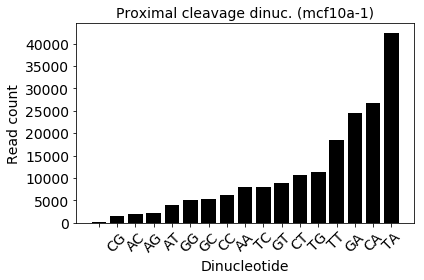

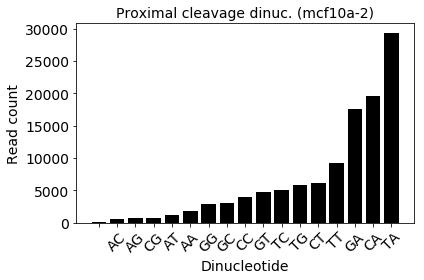

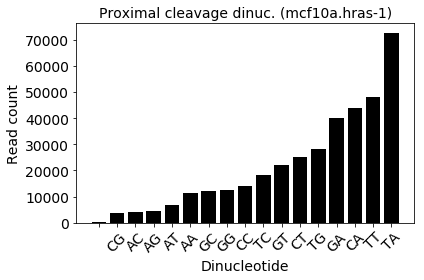

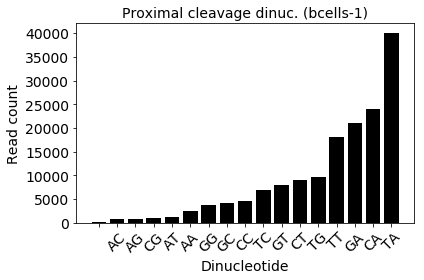

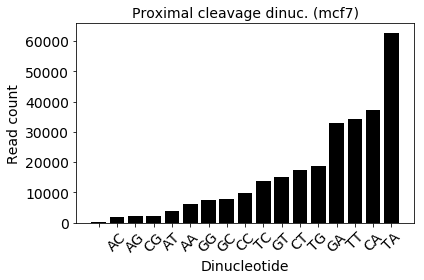

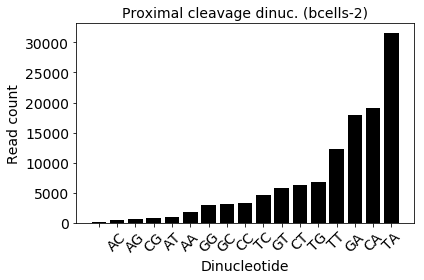

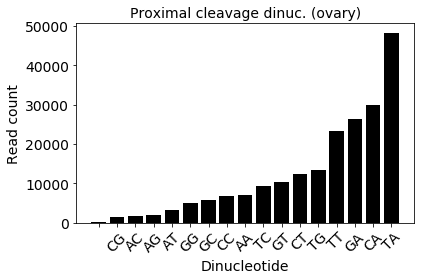

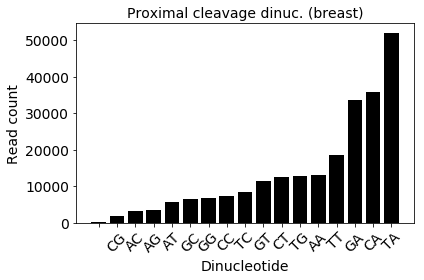

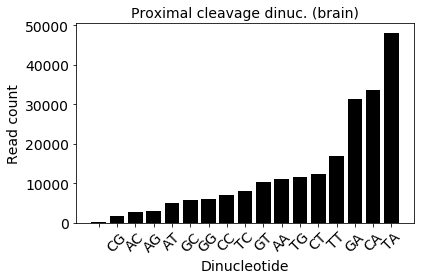

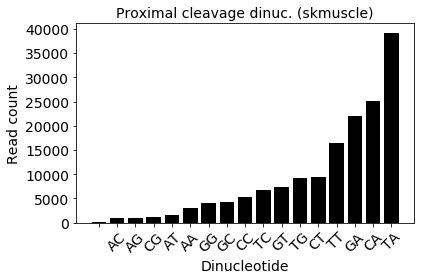

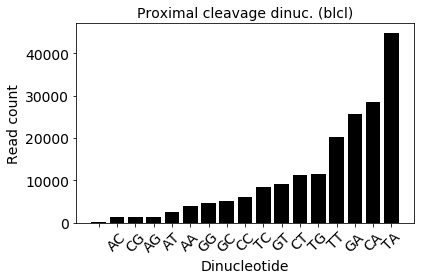

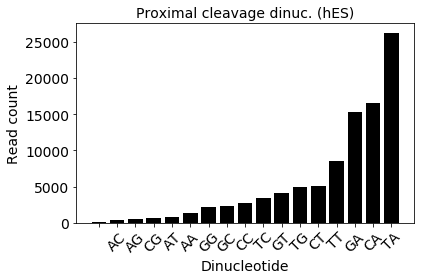

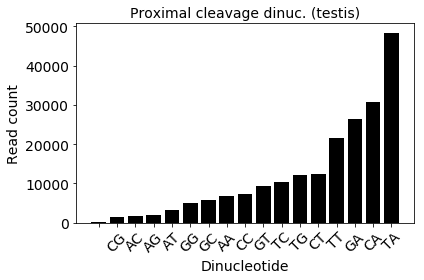

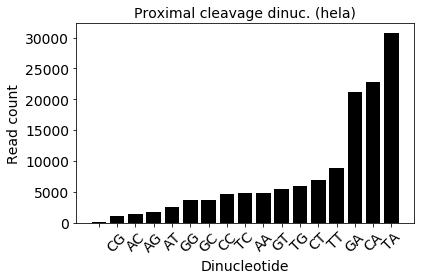

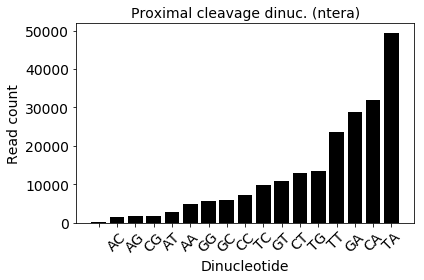

In [32]:
import operator

for cell_type_i in range(0, len(apadb_cell_type_index)) :
    cut_mer2 = {}
    
    cell_type = apadb_cell_type_index[cell_type_i]
        
    cleavage_mat = apadb_cleavage_count_matrix_wide_dict[cell_type]

    cx = sp.coo_matrix(cleavage_mat)

    for i,j,v in zip(cx.row, cx.col, cx.data) :
        event_id = apadb_index[i]
        
        seq = apadb_dict[event_id]['wide_seq']

        mer2 = seq[j-1:j+1]
        if mer2 not in cut_mer2 :
            cut_mer2[mer2] = 0
        cut_mer2[mer2] += 1

    cut_mer2_sorted = sorted(cut_mer2.items(), key=operator.itemgetter(1))

    mer2_list = []
    mer2_vals = []
    for i in range(0, len(cut_mer2_sorted)) :
        mer2_list.append(cut_mer2_sorted[i][0])
        mer2_vals.append(cut_mer2_sorted[i][1])

    f = plt.figure(figsize=(6, 4))

    plt.bar(mer2_list, mer2_vals, color='black')

    plt.title('Proximal cleavage dinuc. (' + cell_type + ')', fontsize=14)
    plt.xlabel('Dinucleotide', fontsize=14)
    plt.ylabel('Read count', fontsize=14)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.show()

In [33]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


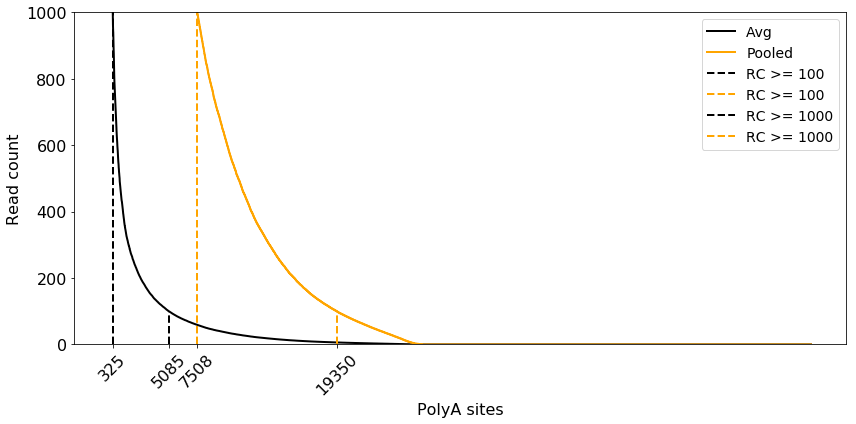

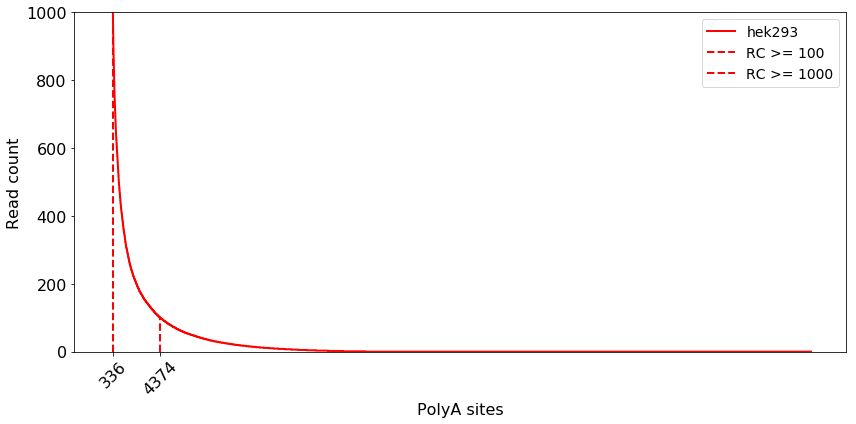

In [39]:

min_avg_count = 0

avg_isoform_count_unfiltered = np.mean(apadb_isoform_count_matrix, axis=1)
avg_total_count_unfiltered = np.mean(apadb_total_count_matrix, axis=1)

sum_isoform_count_unfiltered = np.sum(apadb_isoform_count_matrix, axis=1)
sum_total_count_unfiltered = np.sum(apadb_total_count_matrix, axis=1)

filter_index = np.nonzero(avg_total_count_unfiltered >= min_avg_count)[0]

avg_isoform_count = avg_isoform_count_unfiltered[filter_index]
avg_total_count = avg_total_count_unfiltered[filter_index]
sum_isoform_count = sum_isoform_count_unfiltered[filter_index]
sum_total_count = sum_total_count_unfiltered[filter_index]
n_events = filter_index.shape[0]

sort_index = np.argsort(avg_isoform_count)[::-1]

f = plt.figure(figsize=(12, 6))

read_count_marks = [100, 1000]

ls = []

l_avg, = plt.plot(np.arange(n_events), avg_isoform_count[sort_index], c='black', linewidth=2, label='Avg')
ls.append(l_avg)

sum_sort_index = np.argsort(sum_isoform_count)[::-1]
l_sum, = plt.plot(np.arange(n_events), sum_isoform_count[sort_index], c='orange', linewidth=2, label='Pooled')
ls.append(l_sum)

#Avg marks
l_mark_coords = []
for read_count_mark in read_count_marks :
    n_marked_events = np.sum(avg_isoform_count >= read_count_mark)
    l_mark_coords.append(n_marked_events)
    l_mark, = plt.plot([n_marked_events, n_marked_events], [0, avg_isoform_count[sort_index][n_marked_events]], color='black', linestyle='--', linewidth=2, label='RC >= ' + str(read_count_mark))
    
    ls.append(l_mark)
    
    
    n_marked_events = np.sum(sum_isoform_count >= read_count_mark)
    l_mark_coords.append(n_marked_events)
    l_mark, = plt.plot([n_marked_events, n_marked_events], [0, sum_isoform_count[sum_sort_index][n_marked_events]], color='orange', linestyle='--', linewidth=2, label='RC >= ' + str(read_count_mark))
    
    ls.append(l_mark)

plt.xticks(l_mark_coords, l_mark_coords, fontsize=16, rotation=45)
plt.xlabel('PolyA sites', fontsize=16)

plt.yticks(fontsize=16)
plt.ylabel('Read count', fontsize=16)

plt.ylim(0, 1000)

plt.legend(handles=ls, fontsize=14)

plt.tight_layout()
plt.savefig('leslie_apadb_read_distribution_pooled_avg.png')
plt.show()





f = plt.figure(figsize=(12, 6))

read_count_marks = [100, 1000]

ls = []

hek293_j = np.nonzero(apadb_cell_type_index == 'hek293')[0][0]
hek293_isoform_count = apadb_isoform_count_matrix[filter_index, hek293_j]
hek293_sort_index = np.argsort(hek293_isoform_count)[::-1]

l_hek293, = plt.plot(np.arange(n_events), hek293_isoform_count[hek293_sort_index], c='red', linewidth=2, label='hek293')
ls.append(l_hek293)

l_mark_coords = []
for read_count_mark in read_count_marks :
    n_marked_events = np.sum(hek293_isoform_count >= read_count_mark)
    l_mark_coords.append(n_marked_events)
    l_mark, = plt.plot([n_marked_events, n_marked_events], [0, hek293_isoform_count[hek293_sort_index][n_marked_events]], color='red', linestyle='--', linewidth=2, label='RC >= ' + str(read_count_mark))
    
    ls.append(l_mark)

plt.xticks(l_mark_coords, l_mark_coords, fontsize=16, rotation=45)
plt.xlabel('PolyA sites', fontsize=16)

plt.yticks(fontsize=16)
plt.ylabel('Read count', fontsize=16)

plt.ylim(0, 1000)

plt.legend(handles=ls, fontsize=14)

plt.tight_layout()
plt.savefig('leslie_apadb_read_distribution_hek293.png')
plt.show()



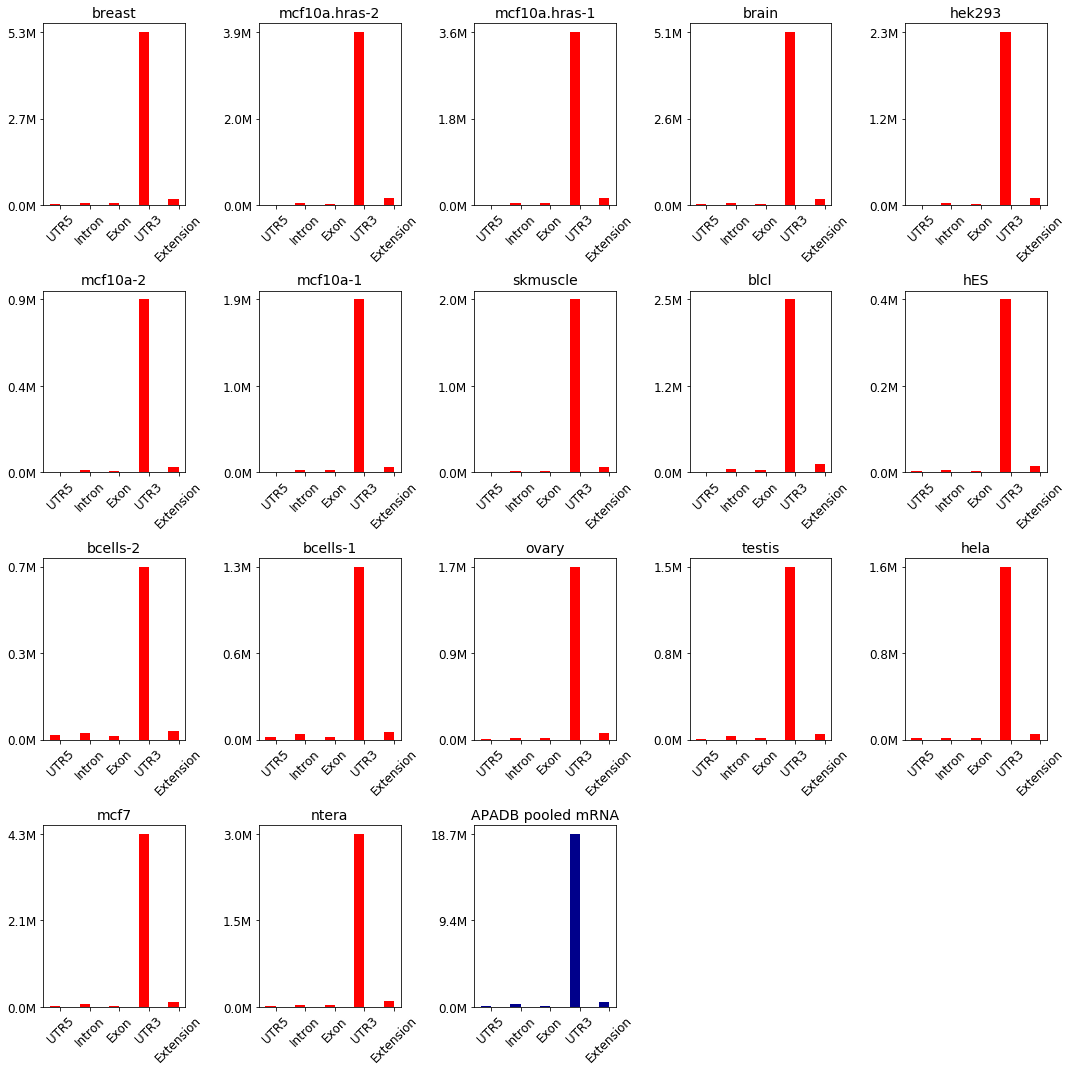

In [40]:
#Read count statistics

n_rows = 4
n_cols = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_cols))

width = 0.35

site_types = ['UTR5', 'Intron', 'Exon', 'UTR3', 'Extension']

for row_i in range(0, n_rows) :
    for col_i in range(0, n_cols) :
        ax[row_i, col_i].axis('off')


for cell_type_i in range(0, len(apadb_cell_type_index)) :
    cell_type = apadb_cell_type_index[cell_type_i]
    
    row_i = int(cell_type_i / n_cols)
    col_i = int(cell_type_i % n_cols)
    
    ax[row_i, col_i].axis('on')
    
    site_type_i = 0
    
    read_counts = np.zeros(len(site_types))
    
    for site_type in site_types :
        read_count = np.sum(apadb_isoform_count_matrix[apadb_type_index == site_type, cell_type_i])
        read_counts[site_type_i] = read_count
        site_type_i += 1
    
    p1 = ax[row_i, col_i].bar(np.arange(len(site_types)), read_counts / (10.**6), width, color='r')
    
    ax[row_i, col_i].set_title(cell_type, fontsize=14)
    
    ax[row_i, col_i].set_xticks(np.arange(len(site_types)) + width / 2)
    ax[row_i, col_i].set_xticklabels(site_types)
    ax[row_i, col_i].tick_params(axis='x', which='major', labelsize=12, rotation=45)
    ax[row_i, col_i].tick_params(axis='x', which='minor', labelsize=12, rotation=45)
    
    max_read_count = np.max(read_counts / (10.**6))
    ax[row_i, col_i].set_yticks([0.0, max_read_count * 0.5, max_read_count * 1.0])
    ax[row_i, col_i].yaxis.set_major_formatter(FormatStrFormatter('%.1fM'))
    ax[row_i, col_i].tick_params(axis='y', which='major', labelsize=12)
    ax[row_i, col_i].tick_params(axis='y', which='minor', labelsize=12)
    

#APADB pooled tissue counts
row_i = 3
col_i = 2
ax[row_i, col_i].axis('on')
read_counts = np.zeros(len(site_types))

site_type_i = 0
for site_type in site_types :
    read_count = np.sum(apadb_orig_count[apadb_type_index == site_type])
    read_counts[site_type_i] = read_count
    site_type_i += 1
    
p1 = ax[row_i, col_i].bar(np.arange(len(site_types)), read_counts / (10.**6), width, color='darkblue')

ax[row_i, col_i].set_title('APADB pooled mRNA', fontsize=14)

ax[row_i, col_i].set_xticks(np.arange(len(site_types)) + width / 2)
ax[row_i, col_i].set_xticklabels(site_types)
ax[row_i, col_i].tick_params(axis='x', which='major', labelsize=12, rotation=45)
ax[row_i, col_i].tick_params(axis='x', which='minor', labelsize=12, rotation=45)

max_read_count = np.max(read_counts / (10.**6))
ax[row_i, col_i].set_yticks([0.0, max_read_count * 0.5, max_read_count * 1.0])
ax[row_i, col_i].yaxis.set_major_formatter(FormatStrFormatter('%.1fM'))
ax[row_i, col_i].tick_params(axis='y', which='major', labelsize=12)
ax[row_i, col_i].tick_params(axis='y', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig('apadb_leslie_read_counts.png')
plt.show()


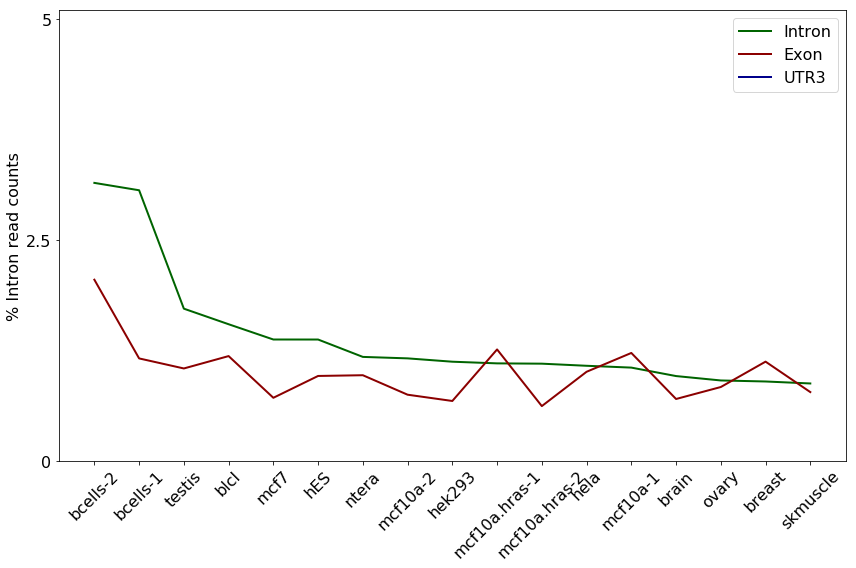

In [42]:

fig = plt.figure(figsize=(12, 8))

site_types = ['Intron', 'Exon', 'UTR3']

type_frac = np.zeros((len(site_types), len(apadb_cell_type_index)))

for cell_type_i in range(0, len(apadb_cell_type_index)) :
    cell_type = apadb_cell_type_index[cell_type_i]
    
    site_type_i = 0
    for site_type in site_types :
        
        type_count = apadb_isoform_count_matrix[(apadb_type_index == site_type), cell_type_i]
        all_type_count = apadb_isoform_count_matrix[:, cell_type_i]
        
        type_frac[site_type_i, cell_type_i] = np.sum(type_count) / np.sum(all_type_count)
        
        site_type_i += 1
    

sort_index = np.argsort(np.ravel(type_frac[0, :]))[::-1]

ls = []
site_color = ['darkgreen', 'darkred', 'darkblue']

site_type_i = 0
for site_type in site_types :
    l1, = plt.plot(np.arange(len(apadb_cell_type_index)), type_frac[site_type_i, sort_index], c=site_color[site_type_i], label=site_type, linewidth=2)
    
    ls.append(l1)
    
    site_type_i += 1

plt.xticks(np.arange(len(apadb_cell_type_index)), apadb_cell_type_index[sort_index], fontsize=16, rotation=45)

plt.ylim(0, 0.051)
plt.yticks([0.0, 0.025, 0.05], [0, 2.5, 5], fontsize=16)
plt.ylabel('% Intron read counts', fontsize=16)

plt.legend(handles=ls, fontsize=16)

plt.tight_layout()
plt.savefig('apadb_leslie_intron_fraction.png')
plt.show()


Cell type 1 = breast
Cell type 1 = mcf10a.hras-2
Cell type 1 = mcf10a.hras-1
Cell type 1 = brain
Cell type 1 = hek293
Cell type 1 = mcf10a-2
Cell type 1 = mcf10a-1
Cell type 1 = skmuscle
Cell type 1 = blcl
Cell type 1 = hES
Cell type 1 = bcells-2
Cell type 1 = bcells-1
Cell type 1 = ovary
Cell type 1 = testis
Cell type 1 = hela
Cell type 1 = mcf7
Cell type 1 = ntera


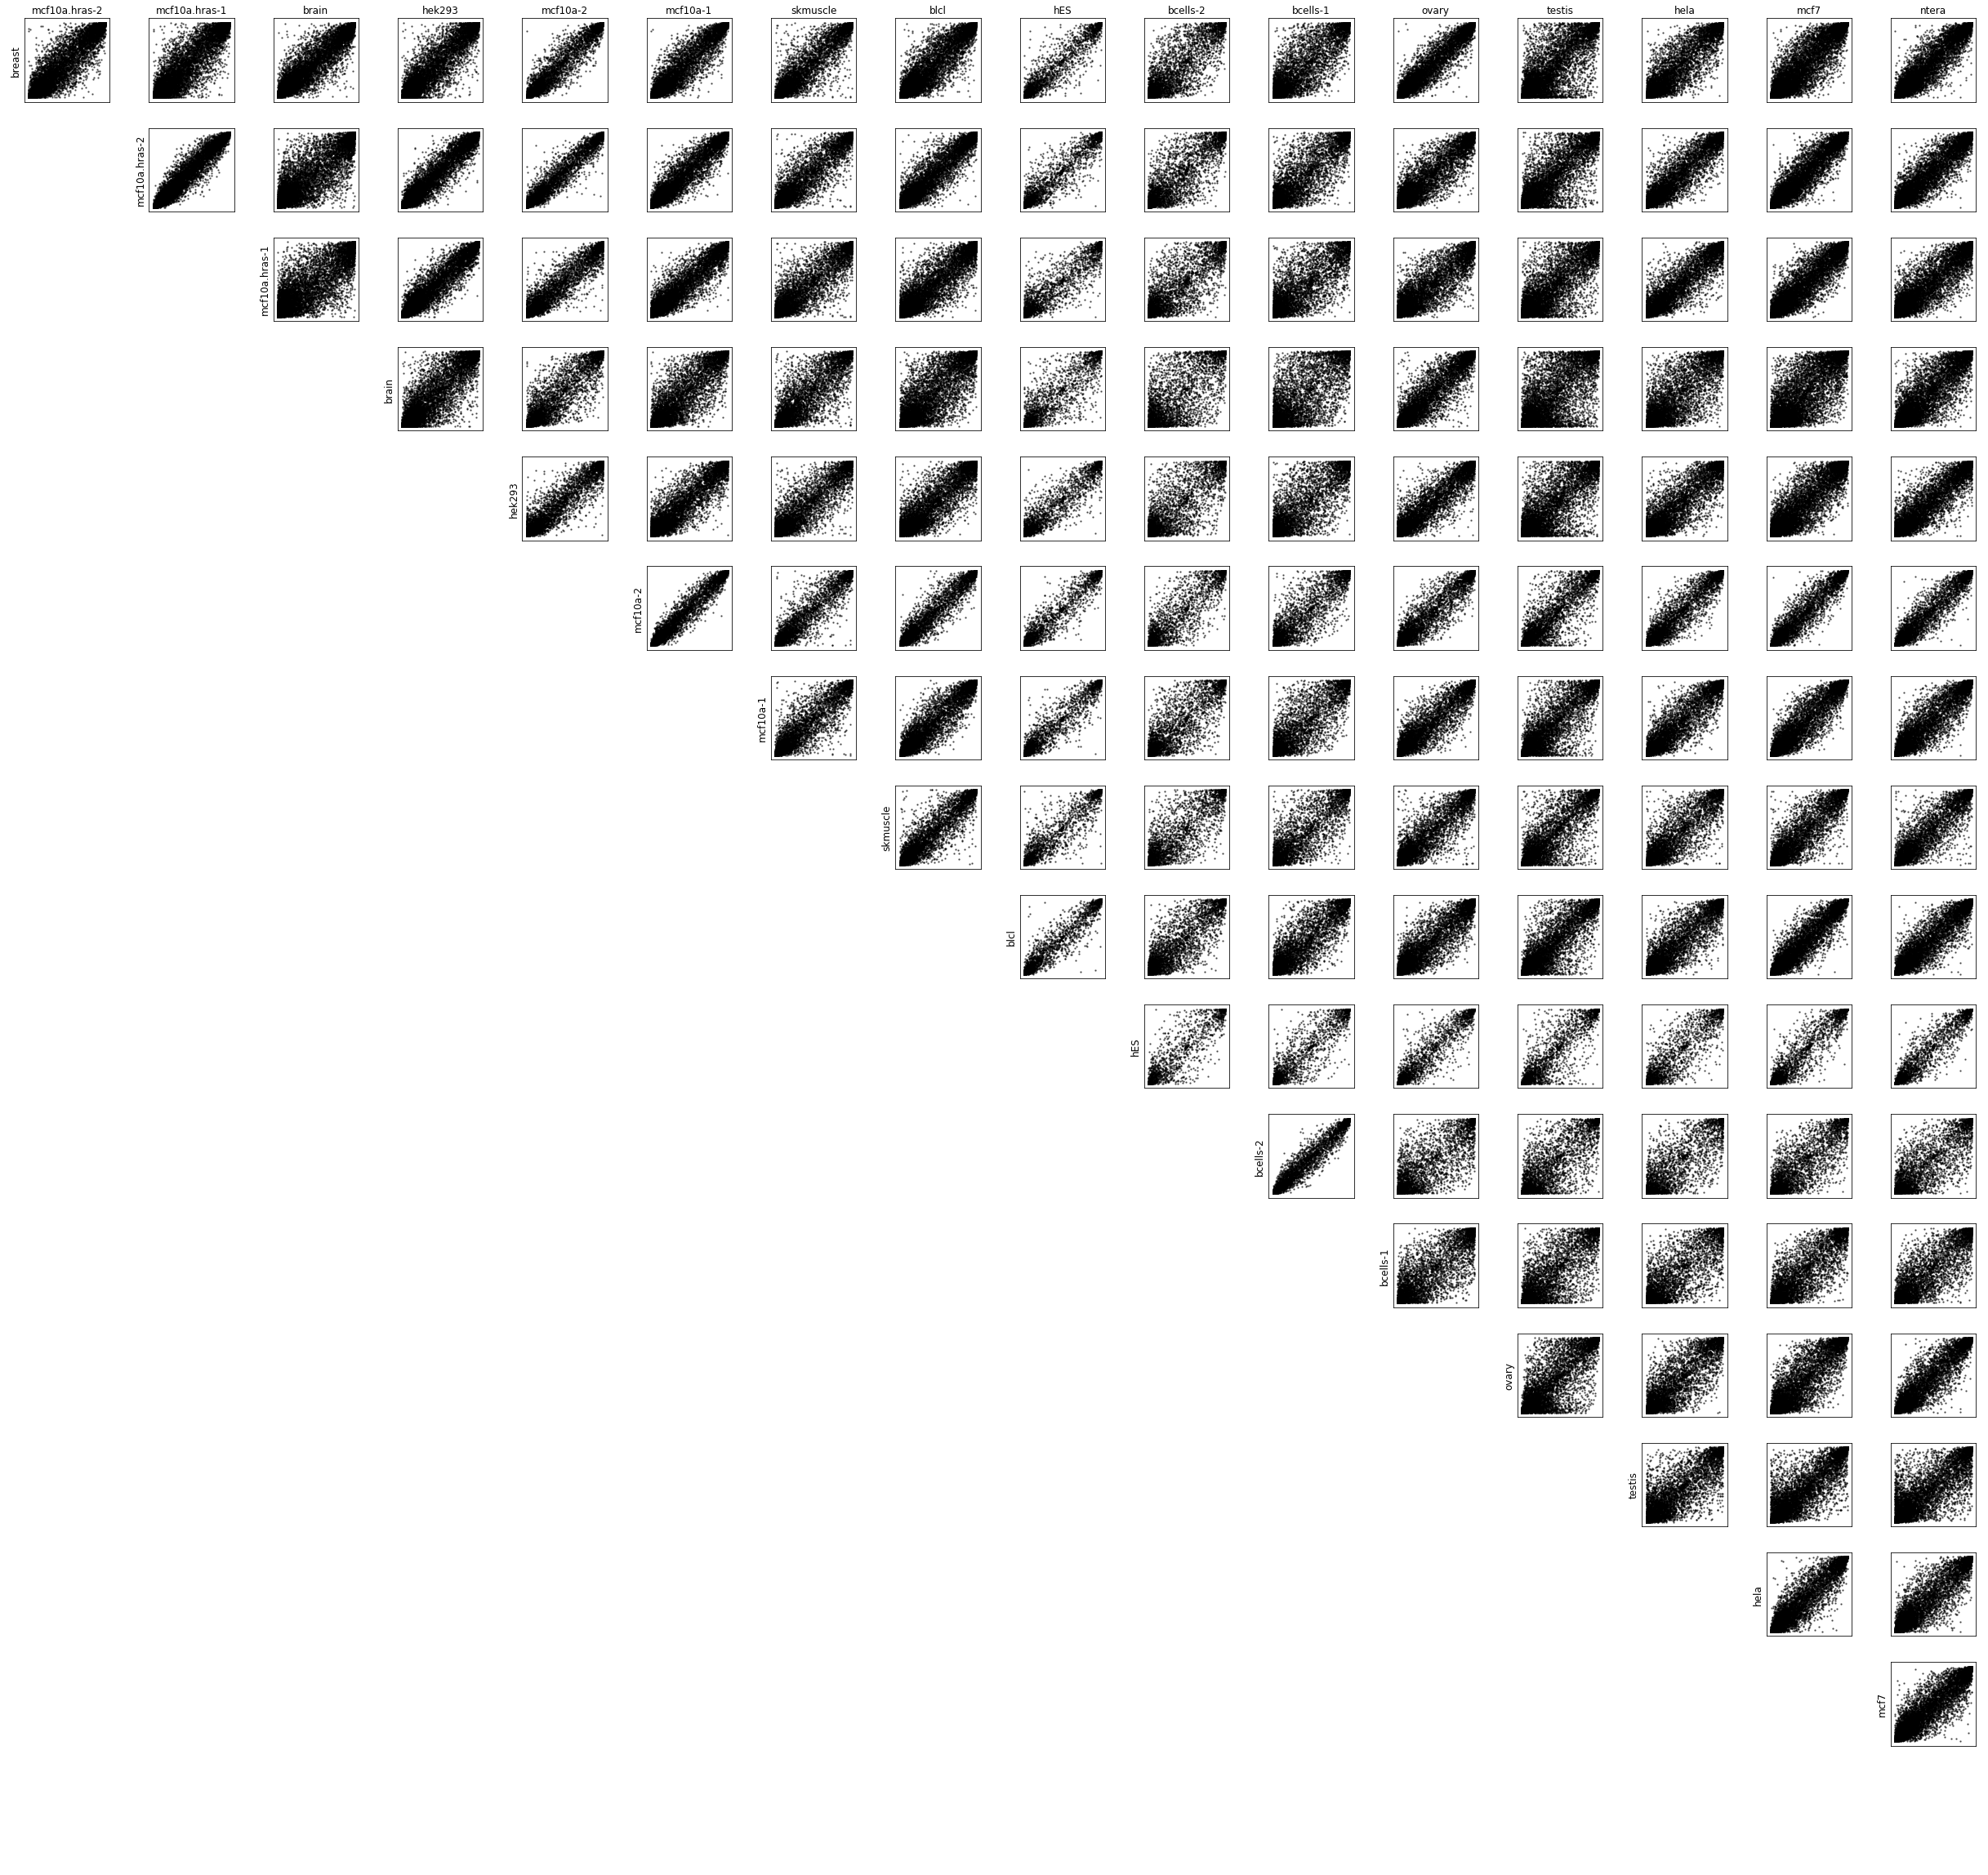

In [43]:
from scipy.stats import pearsonr

#Differential total usage scatter plot

site_type = 'UTR3'

#cell_type_blacklist = ['hES', 'bcells-2']

n_rows = len(apadb_cell_type_index)
n_cols = len(apadb_cell_type_index) - 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=(2 * n_rows, 2 * n_cols))

min_total_count = 50
show_r2_only = False

r2_heatmap = np.zeros((len(apadb_cell_type_index), len(apadb_cell_type_index)))
r2_heatmap[np.arange(len(apadb_cell_type_index)), np.arange(len(apadb_cell_type_index))] = 1

for cell_type_i in range(0, n_rows) :
    for cell_type_j in range(0, n_cols) :
        ax[cell_type_i, cell_type_j].axis('off')

for cell_type_i in range(0, len(apadb_cell_type_index)) :
    cell_type_1 = apadb_cell_type_index[cell_type_i]
    
    print('Cell type 1 = ' + str(cell_type_1))
    
    isoform_count_1_unfiltered = apadb_isoform_count_matrix[(apadb_type_index == site_type), cell_type_i]
    total_count_1_unfiltered = apadb_total_count_matrix[(apadb_type_index == site_type), cell_type_i]
    
    for cell_type_j in range(cell_type_i + 1, len(apadb_cell_type_index)) :
        cell_type_2 = apadb_cell_type_index[cell_type_j]
    
        isoform_count_2_unfiltered = apadb_isoform_count_matrix[(apadb_type_index == site_type), cell_type_j]
        total_count_2_unfiltered = apadb_total_count_matrix[(apadb_type_index == site_type), cell_type_j]
        
        filter_index = np.nonzero((total_count_1_unfiltered > min_total_count) & (total_count_2_unfiltered > min_total_count))[0]
        
        isoform_count_1 = isoform_count_1_unfiltered[filter_index]
        total_count_1 = total_count_1_unfiltered[filter_index]
        
        isoform_count_2 = isoform_count_2_unfiltered[filter_index]
        total_count_2 = total_count_2_unfiltered[filter_index]
        
        total_ratio_1 = isoform_count_1 / total_count_1
        total_ratio_2 = isoform_count_2 / total_count_2
        #total_ratio_1 = (isoform_count_1 + 0.1) / (total_count_1 + 0.2)
        #total_ratio_2 = (isoform_count_2 + 0.1) / (total_count_2 + 0.2)
        
        #total_logodds_1 = np.log( total_ratio_1 / (1.0 - total_ratio_1) )
        #total_logodds_2 = np.log( total_ratio_2 / (1.0 - total_ratio_2) )
        
        pearson_r, _ = pearsonr(total_ratio_1, total_ratio_2)
        pearson_r2 = round(pearson_r * pearson_r, 2)
        
        r2_heatmap[cell_type_i, cell_type_j] = pearson_r2
        r2_heatmap[cell_type_j, cell_type_i] = pearson_r2
        
        if show_r2_only :
            ax[cell_type_i, cell_type_j-1].axis('on')
            x_str = 'r^2 = ' + str(pearson_r2)
            ax[cell_type_i, cell_type_j-1].text(0.5, 0.5, x_str, transform=ax[cell_type_i, cell_type_j-1].transAxes, fontsize=14,
                        horizontalalignment='center', verticalalignment='center', bbox=None, rotation=45)
        else :
            ax[cell_type_i, cell_type_j-1].axis('on')
            ax[cell_type_i, cell_type_j-1].scatter(total_ratio_2, total_ratio_1, c='black', s=2, alpha=0.5)
        
        ax[cell_type_i, cell_type_j-1].set_xticks([], [])
        ax[cell_type_i, cell_type_j-1].set_yticks([], [])

        #ax[cell_type_i, cell_type_j].set_xticklabels(site_types)
        #ax[cell_type_i, cell_type_j].tick_params(axis='x', which='major', labelsize=12, rotation=45)
        #ax[cell_type_i, cell_type_j].tick_params(axis='x', which='minor', labelsize=12, rotation=45)
        
        if cell_type_i == 0 :
            ax[cell_type_i, cell_type_j-1].set_title(cell_type_2, fontsize=12)
        if cell_type_j == cell_type_i + 1 :
            ax[cell_type_i, cell_type_j-1].set_ylabel(cell_type_1, fontsize=12)


plt.tight_layout()

plt.savefig('leslie_apadb_differential_total_usage_' + site_type + '.png')

plt.show()


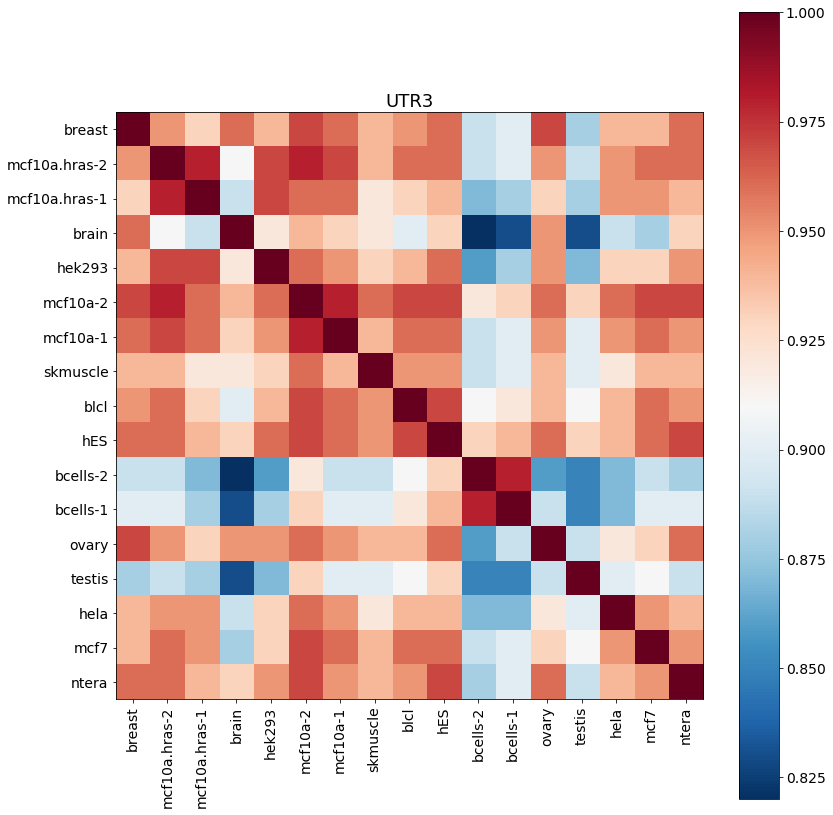

In [44]:
f = plt.figure(figsize=(12, 12))

plt.imshow(r2_heatmap, cmap='RdBu_r')

plt.xticks(np.arange(len(apadb_cell_type_index)), apadb_cell_type_index, fontsize=14, rotation=90)
plt.yticks(np.arange(len(apadb_cell_type_index)), apadb_cell_type_index, fontsize=14, rotation=0)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()

plt.title(site_type, fontsize=18)

plt.savefig('leslie_apadb_differential_total_usage_' + site_type + '_correlation.png')

plt.show()

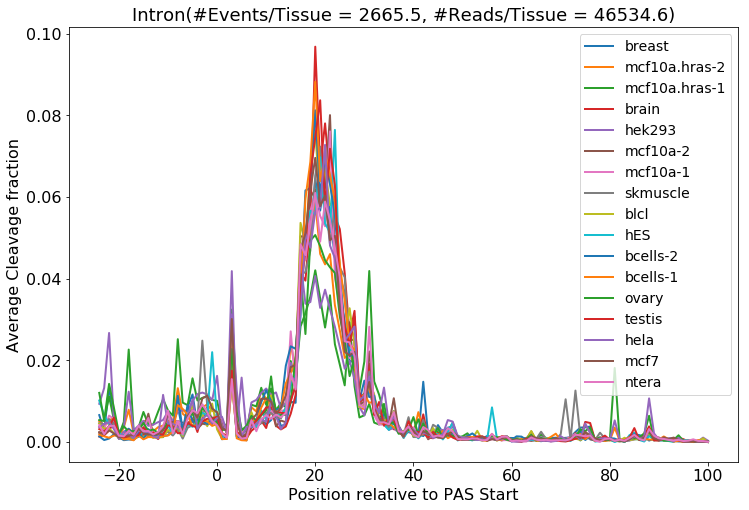

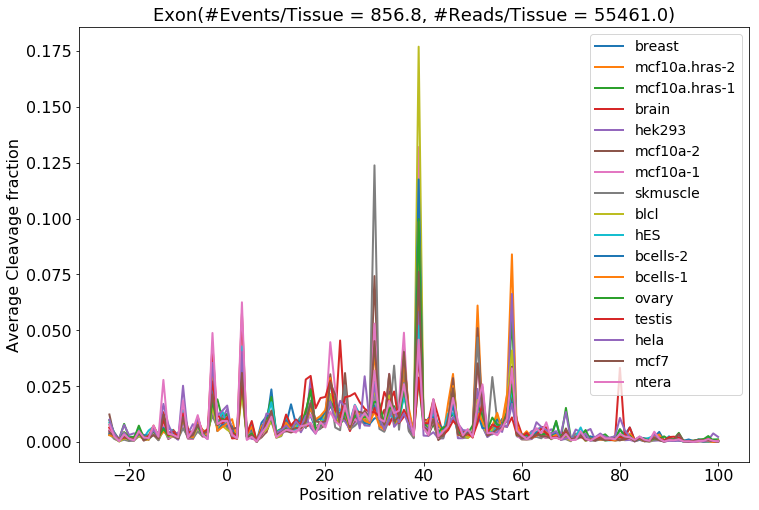

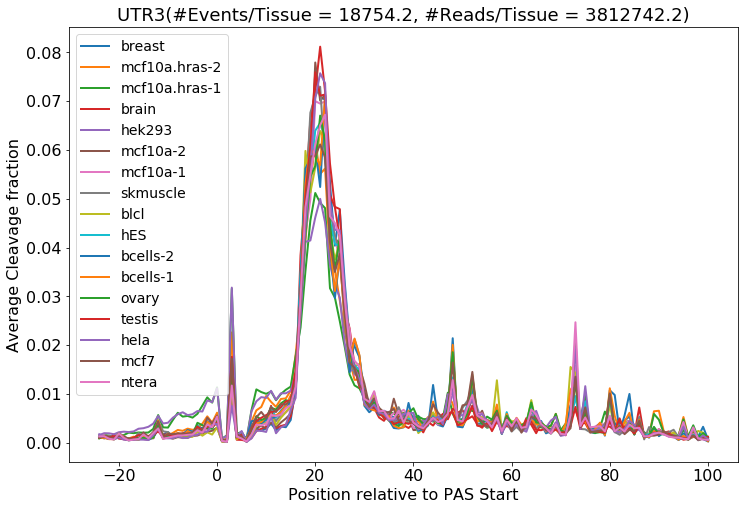

In [45]:

#Sum of cleavage counts, normalized, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=25
max_pos=150
pas_offset=49

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > 0, :]
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts)
        
        cleavage_distrib = np.sum(cleavage_counts, axis=0)
        cleavage_distrib /= np.sum(cleavage_distrib)
        
        l1, = plt.plot(np.arange(185)[min_pos:max_pos]-pas_offset, cleavage_distrib[min_pos:max_pos], label=cell_type, linewidth=2)
        ls.append(l1)
    
    avg_n_events = round(np.mean(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events/Tissue = ' + str(avg_n_events) + ', #Reads/Tissue = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.show()
    
    site_type_i += 1






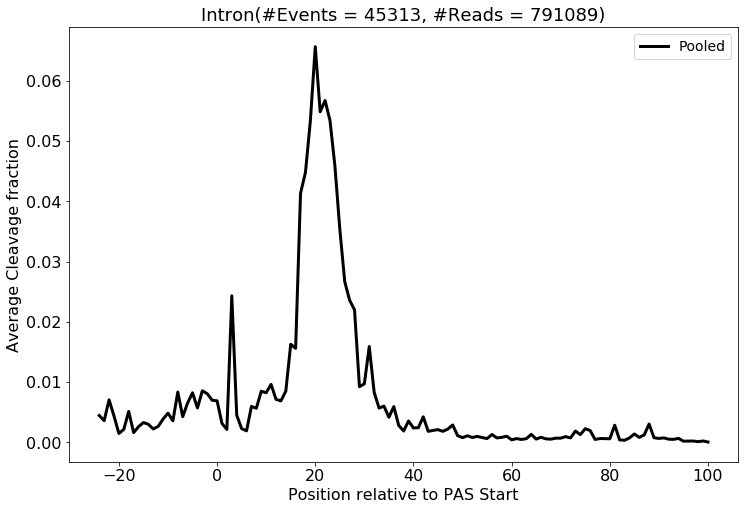

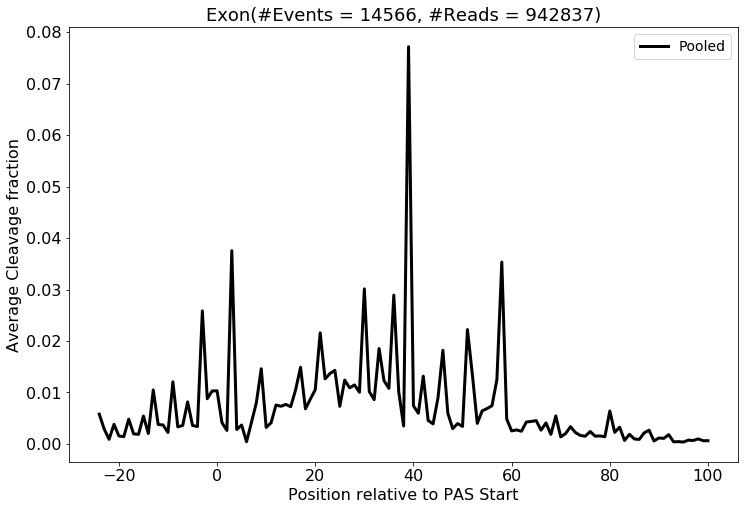

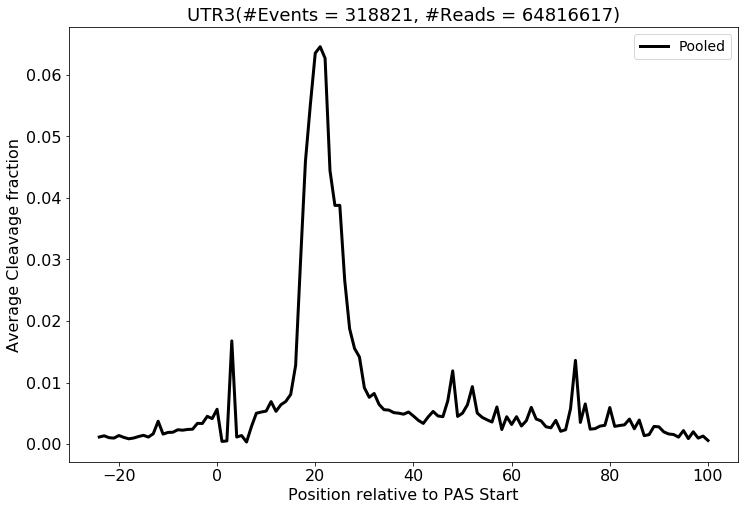

In [46]:

#Sum of cleavage counts, normalized, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=25
max_pos=150
pas_offset=49

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    cum_cleavage_counts = np.zeros(185)
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > 0, :]
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts)
        
        cum_cleavage_counts += np.sum(cleavage_counts, axis=0)
    
    cum_cleavage_distrib = cum_cleavage_counts / np.sum(cum_cleavage_counts)
        
    l1, = plt.plot(np.arange(185)[min_pos:max_pos]-pas_offset, cum_cleavage_distrib[min_pos:max_pos], c='black', label='Pooled', linewidth=3)
    ls.append(l1)
    
    avg_n_events = int(round(np.sum(n_events), 0))
    avg_n_reads = int(round(np.sum(n_reads), 0))
    
    plt.title(site_type + '(#Events = ' + str(avg_n_events) + ', #Reads = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.show()
    
    site_type_i += 1






min_read_count / event = 10


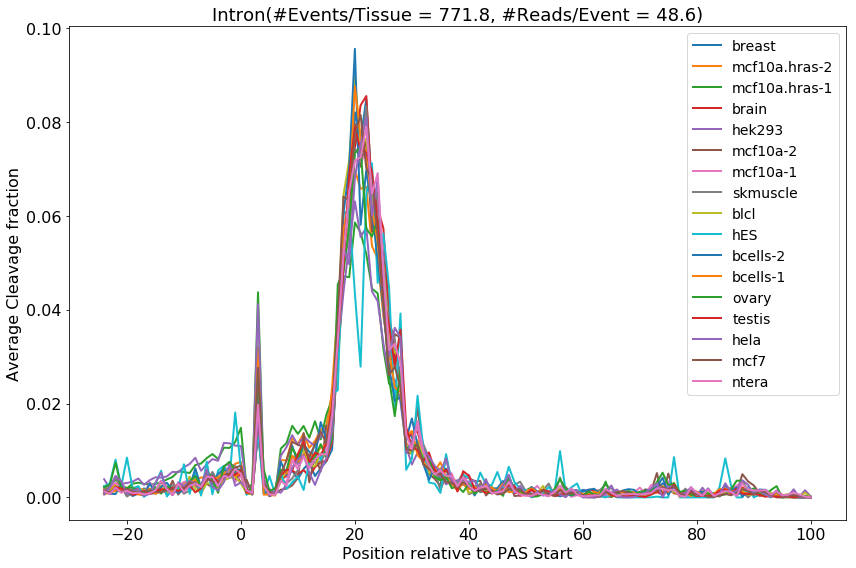

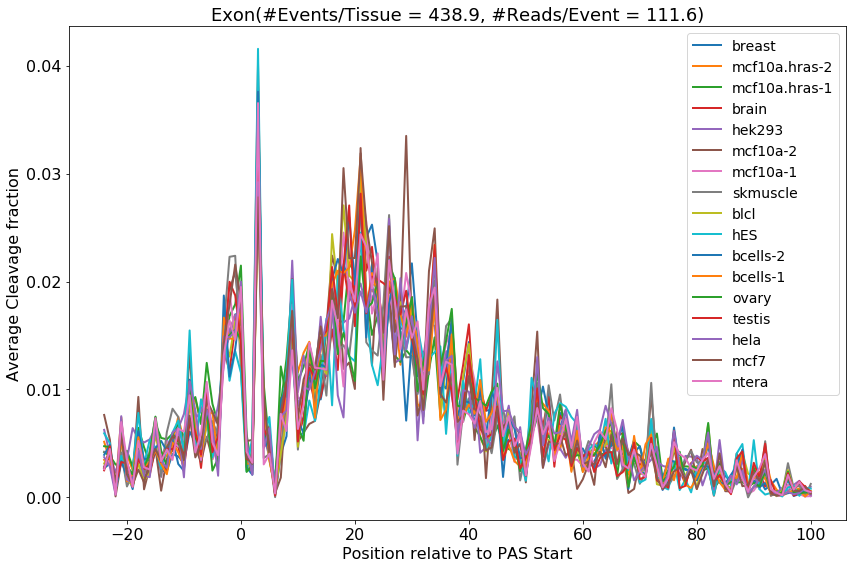

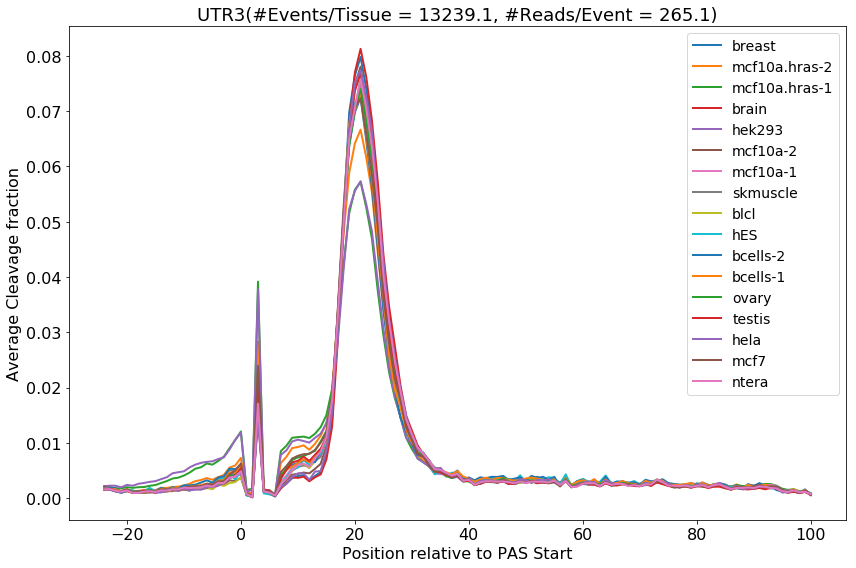

In [47]:

#Mean of normalized cleavage counts, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=25
max_pos=150
pas_offset=49

min_read_count = 10

print('min_read_count / event = ' + str(min_read_count))

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > min_read_count, :]
        
        cleavage_distribs = cleavage_counts / np.sum(cleavage_counts, axis=1).reshape(-1, 1)
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts) / n_events[cell_type_i]
        
        cleavage_distrib = np.mean(cleavage_distribs, axis=0)
        
        l1, = plt.plot(np.arange(185)[min_pos:max_pos]-pas_offset, cleavage_distrib[min_pos:max_pos], label=cell_type, linewidth=2)
        ls.append(l1)
    
    avg_n_events = round(np.mean(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events/Tissue = ' + str(avg_n_events) + ', #Reads/Event = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.tight_layout()
    plt.savefig('apadb_leslie_cleavage_' + site_type + '.png')
    plt.show()
    
    site_type_i += 1






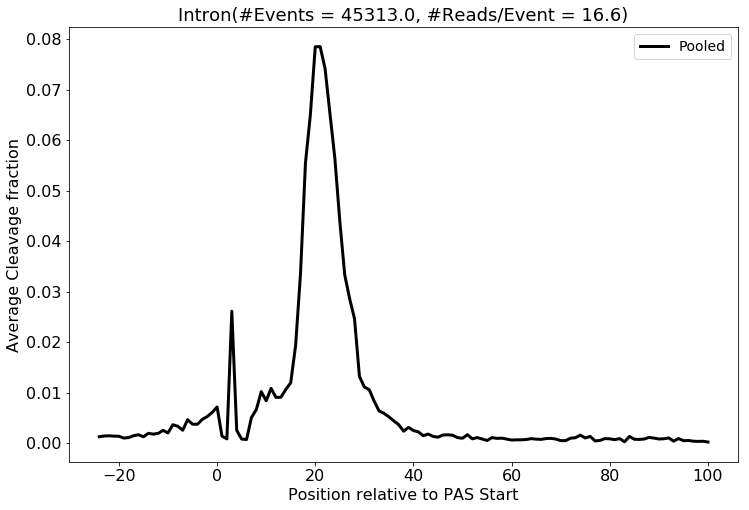

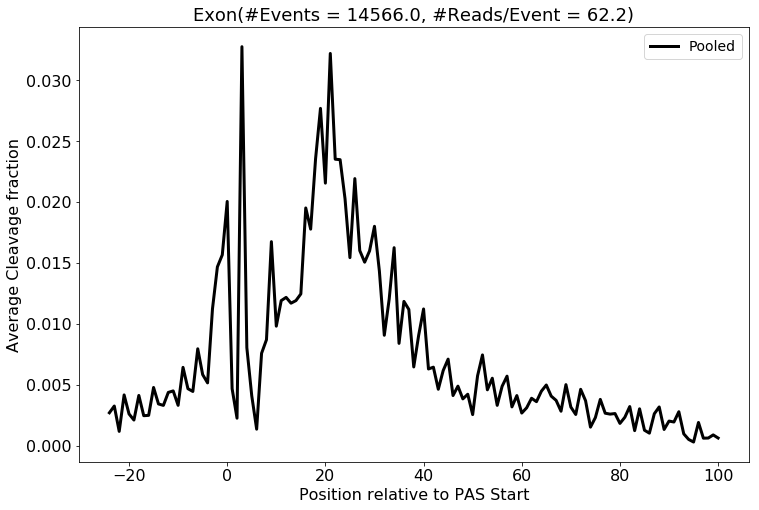

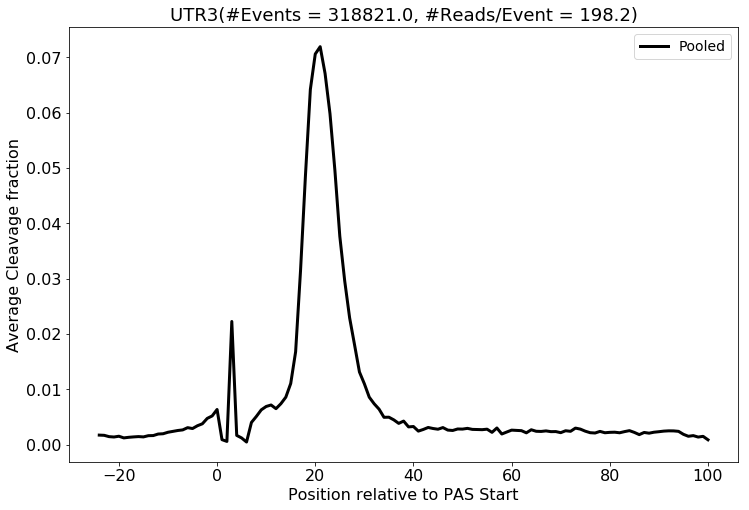

In [48]:

#Sum of cleavage counts, normalized, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=25
max_pos=150
pas_offset=49

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    cum_cleavage_distribs = np.zeros((185, len(apadb_cell_type_index)))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > 0, :]
        
        cleavage_distribs = cleavage_counts / np.sum(cleavage_counts, axis=1).reshape(-1, 1)
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts) / n_events[cell_type_i]
        
        cleavage_distrib = np.mean(cleavage_distribs, axis=0)
        
        cum_cleavage_distribs[:, cell_type_i] = cleavage_distrib
        
    
    cum_cleavage_distrib = np.mean(cum_cleavage_distribs, axis=1)
        
    l1, = plt.plot(np.arange(185)[min_pos:max_pos]-pas_offset, cum_cleavage_distrib[min_pos:max_pos], c='black', label='Pooled', linewidth=3)
    ls.append(l1)
    
    avg_n_events = round(np.sum(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events = ' + str(avg_n_events) + ', #Reads/Event = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.show()
    
    site_type_i += 1






min_read_count / event = 10


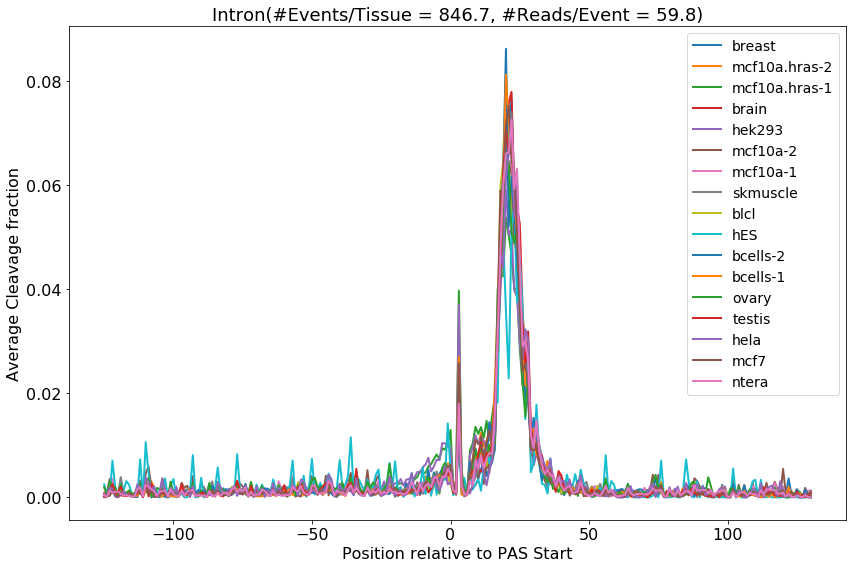

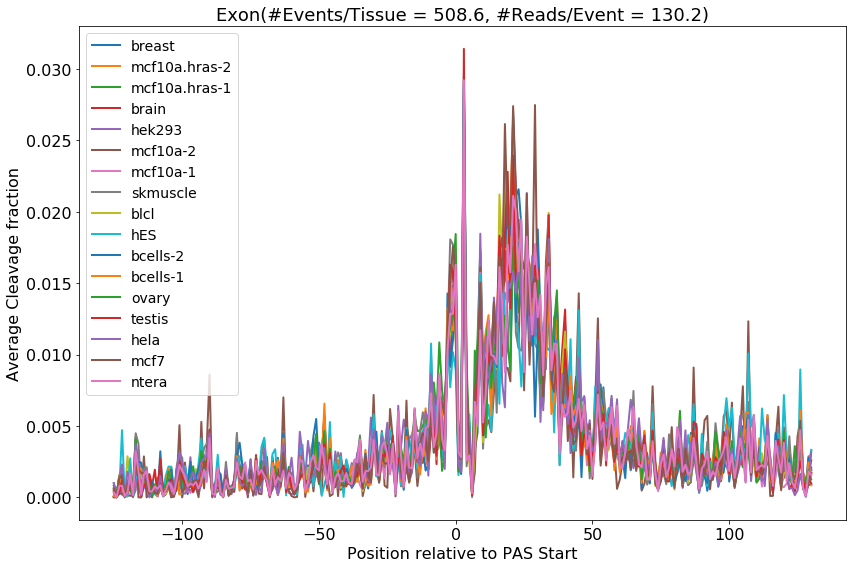

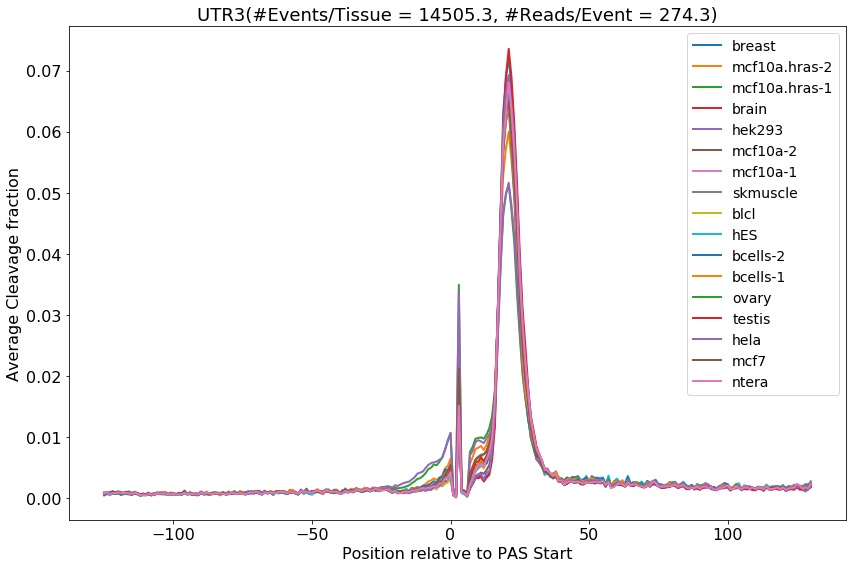

In [30]:

#Mean of normalized cleavage counts, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=0
max_pos=256
pas_offset=125

min_read_count = 10

print('min_read_count / event = ' + str(min_read_count))

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > min_read_count, :]
        
        cleavage_distribs = cleavage_counts / np.sum(cleavage_counts, axis=1).reshape(-1, 1)
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts) / n_events[cell_type_i]
        
        cleavage_distrib = np.mean(cleavage_distribs, axis=0)
        
        l1, = plt.plot(np.arange(256)[min_pos:max_pos]-pas_offset, cleavage_distrib[min_pos:max_pos], label=cell_type, linewidth=2)
        ls.append(l1)
    
    avg_n_events = round(np.mean(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events/Tissue = ' + str(avg_n_events) + ', #Reads/Event = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.tight_layout()
    #plt.savefig('apadb_leslie_cleavage_' + site_type + '.png')
    plt.show()
    
    site_type_i += 1






min_read_count / event = 10


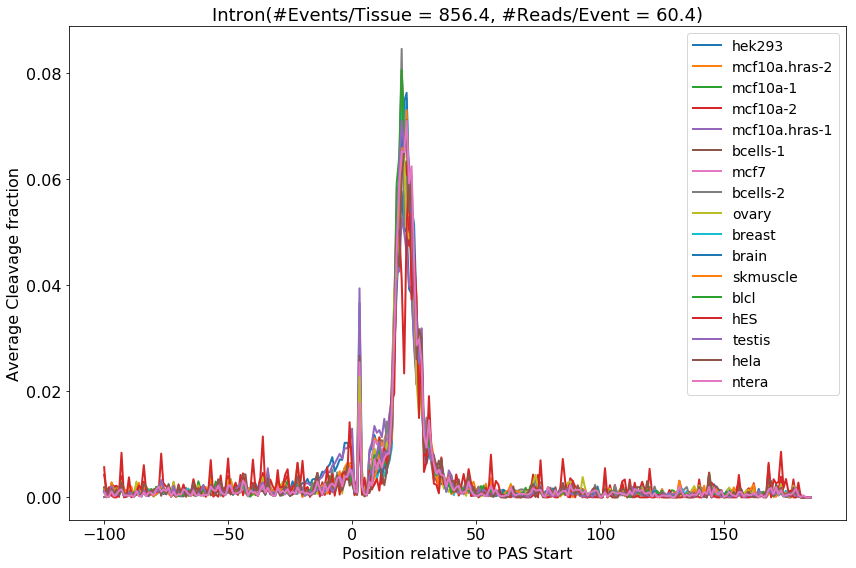

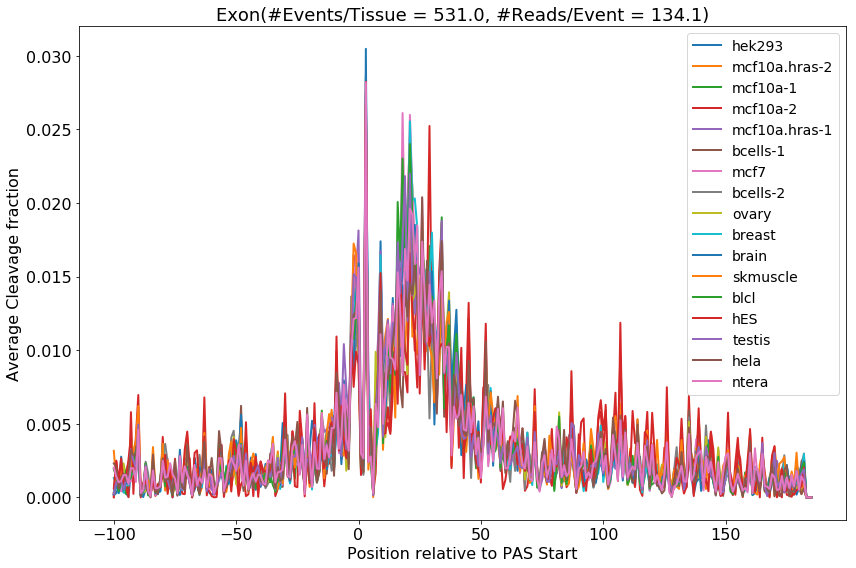

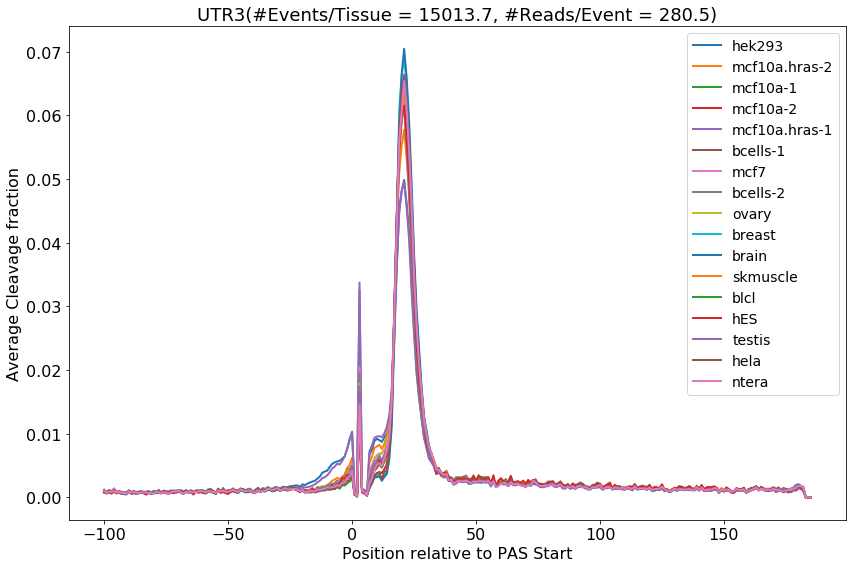

In [35]:

#Mean of normalized cleavage counts, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=0
max_pos=286
pas_offset=100

min_read_count = 10

print('min_read_count / event = ' + str(min_read_count))

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_ext_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > min_read_count, :]
        
        cleavage_distribs = cleavage_counts / np.sum(cleavage_counts, axis=1).reshape(-1, 1)
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts) / n_events[cell_type_i]
        
        cleavage_distrib = np.mean(cleavage_distribs, axis=0)
        
        l1, = plt.plot(np.arange(286)[min_pos:max_pos]-pas_offset, cleavage_distrib[min_pos:max_pos], label=cell_type, linewidth=2)
        ls.append(l1)
    
    avg_n_events = round(np.mean(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events/Tissue = ' + str(avg_n_events) + ', #Reads/Event = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.tight_layout()
    #plt.savefig('apadb_leslie_cleavage_' + site_type + '.png')
    plt.show()
    
    site_type_i += 1






min_read_count / event = 10


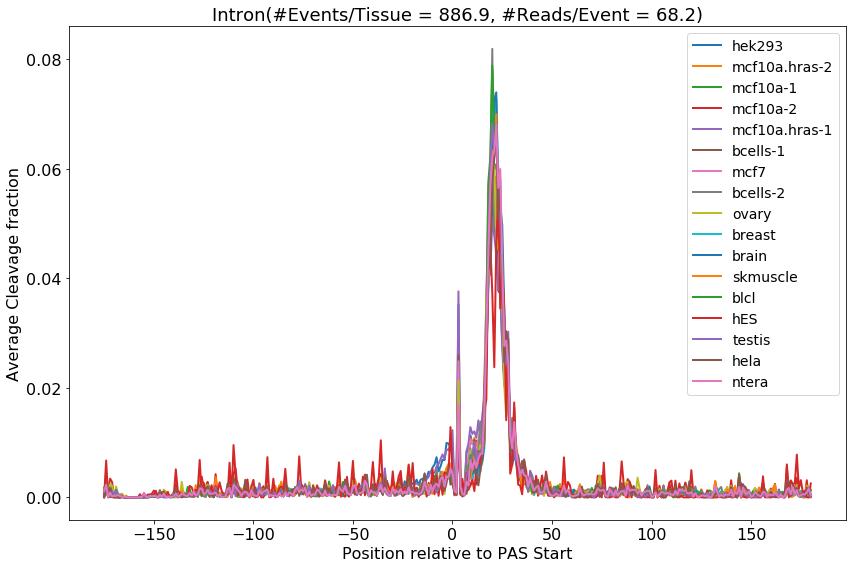

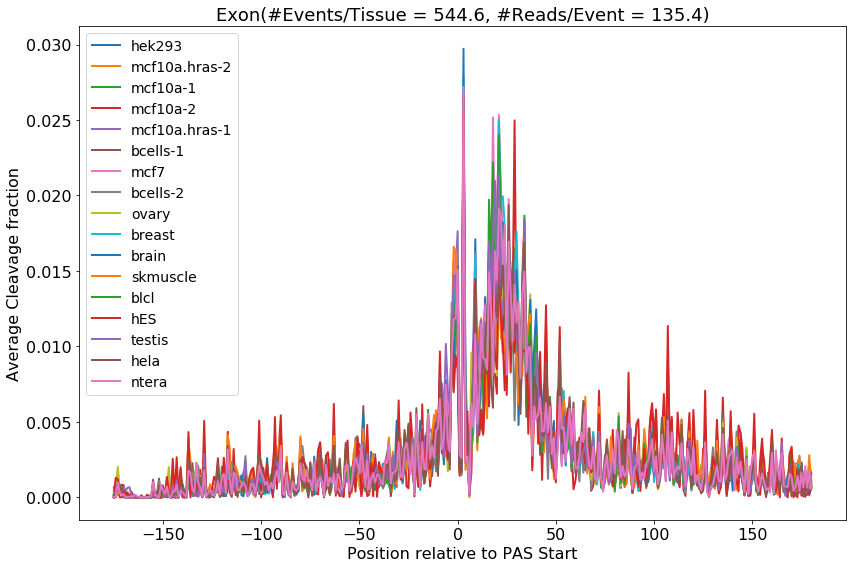

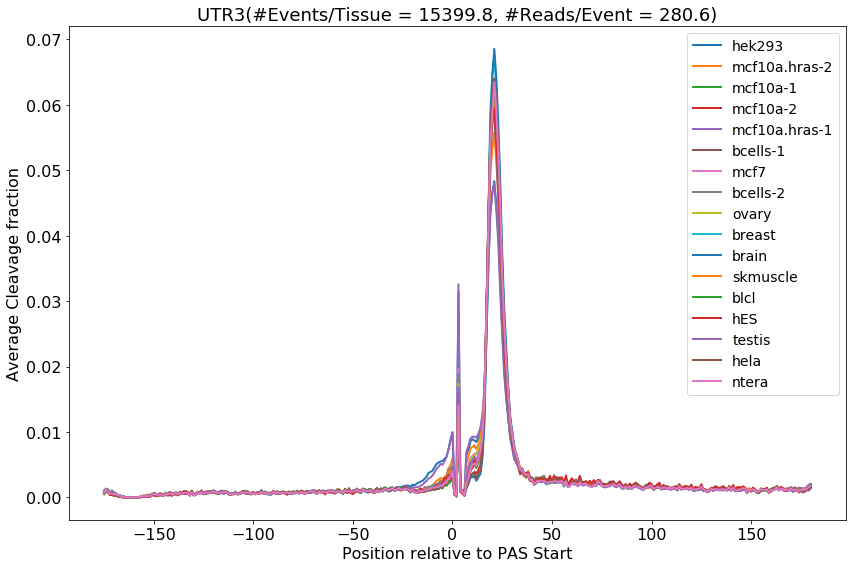

In [34]:

#Mean of normalized cleavage counts, per cell type

site_types = ['Intron', 'Exon', 'UTR3']

min_pos=0
max_pos=356
pas_offset=175

min_read_count = 10

print('min_read_count / event = ' + str(min_read_count))

site_type_i = 0
for site_type in site_types :
    
    fig = plt.figure(figsize=(12, 8))
    ls = []
    
    n_events = np.zeros(len(apadb_cell_type_index))
    n_reads = np.zeros(len(apadb_cell_type_index))
    
    for cell_type_i in range(0, len(apadb_cell_type_index)) :
        cell_type = apadb_cell_type_index[cell_type_i]
        
        cleavage_counts = np.array(apadb_cleavage_count_matrix_wide_ext_dict[cell_type].todense())
        cleavage_counts = cleavage_counts[apadb_type_index == site_type, :]
        cleavage_counts = cleavage_counts[np.sum(cleavage_counts, axis=1) > min_read_count, :]
        
        cleavage_distribs = cleavage_counts / np.sum(cleavage_counts, axis=1).reshape(-1, 1)
        
        n_events[cell_type_i] = cleavage_counts.shape[0]
        n_reads[cell_type_i] = np.sum(cleavage_counts) / n_events[cell_type_i]
        
        cleavage_distrib = np.mean(cleavage_distribs, axis=0)
        
        l1, = plt.plot(np.arange(356)[min_pos:max_pos]-pas_offset, cleavage_distrib[min_pos:max_pos], label=cell_type, linewidth=2)
        ls.append(l1)
    
    avg_n_events = round(np.mean(n_events), 1)
    avg_n_reads = round(np.mean(n_reads), 1)
    
    plt.title(site_type + '(#Events/Tissue = ' + str(avg_n_events) + ', #Reads/Event = ' + str(avg_n_reads) + ')', fontsize=18)
    plt.xlabel('Position relative to PAS Start', fontsize=16)
    plt.ylabel('Average Cleavage fraction', fontsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    plt.legend(handles=ls, fontsize=14)
    plt.tight_layout()
    #plt.savefig('apadb_leslie_cleavage_' + site_type + '.png')
    plt.show()
    
    site_type_i += 1




